# COVID-19 Analysis & Visualizations

**Table of Content**
1. [Setup](#Setup)
2. [Loading Dataset](#Loading-Dataset)
    - [Dataset Info](#Dataset-Info)
3. [Preprocessing](#Preprocessing)
    - [Missing Values](#Missin-Values)
    - [Renaming Countries](#Renaming-Countries)
    - [Renaming Columns](#Renaming-Columns)
    - [Normalizing Dates](#Normalizing-Dates)
    - [Processing Columns](#Processing-Columns)
4. [Analysis & Visualizations](#Analysis-&-Visualizations)
    - [World Cases](#World-Cases)
    - [Top Country](#Top-Country)
5. [European Countries and Switzerland](#European-Countries-and-Switzerland)
    - [Italy](#Italy)
    - [Spain](#Spain)
    - [Germany](#Germany)
    - [France](#France)
    - [United Kingdom](#United-Kingdom)
    - [Switzerland](#Switzerland)
6. [Diamond Princess Cruise](#Diamond-Princess-Cruise)
7. [Loading Other Details](#Loading-Other-Details)
    - [Listing Symptoms](#Listing-Symptoms)
    - [Age Distribution](#Age-Distribution)
    - [Sex Distribution](#Sex-Distribution)
    - [Based on Outcome](#Based-on-Outcome)
        - [Critical Cases by Age](#Critical-Cases-by-Age)
        - [Critical Cases by Sex](#Critical-Cases-by-Sex)

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import re
import warnings

warnings.filterwarnings("ignore")

In [2]:
from utils import total_cases_pie, \
    total_cases_lineplot, \
    mortality_rate, \
    recovery_rate, \
    total_latest_barplot, \
    daily_cases, \
    total_cases_by_country

# Global styles for the charts
sns.set(style='darkgrid', )
plt.rc('font', size=14)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)
plt.rc('figure', figsize=(20,10), titlesize=20)
plt.rc('lines', linewidth=4)

## Loading Dataset

In [3]:
path_to_dataset = 'datasets'

In [4]:
data = pd.read_csv(f'{path_to_dataset}/covid_19_data.csv')

### Dataset Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 8 columns):
SNo                11341 non-null int64
ObservationDate    11341 non-null object
Province/State     7746 non-null object
Country/Region     11341 non-null object
Last Update        11341 non-null object
Confirmed          11341 non-null float64
Deaths             11341 non-null float64
Recovered          11341 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 708.9+ KB


In [6]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,11341.000000,11341.000000,11341.000000,11341.000000
mean,5671.000000,491.569615,17.524116,174.971078
std,3274.009036,4295.461678,204.529848,2334.484509
min,1.000000,0.000000,0.000000,0.000000
25%,2836.000000,1.000000,0.000000,0.000000
50%,5671.000000,5.000000,0.000000,0.000000
75%,8506.000000,71.000000,0.000000,2.000000
max,11341.000000,67800.000000,6077.000000,59882.000000


In [7]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Preprocessing

### Missing Values

In [8]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3595
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [9]:
# Filling null values with `Unknown`
data.fillna('Unknown', inplace=True)

### Renaming Countries

In [10]:
set(data['Country/Region'])

{' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia',
 'Gambia, The',
 'G

In [11]:
def process_country_name(country):
    country = country.strip()
    
    if country == "('St. Martin',)":
        country = 'Saint Martin'
    elif country == 'Mainland China':
        country = 'China'
    elif country == 'UK':
        country = 'United Kingdom'
    elif country == 'US':
        country = 'United States'
    elif country == 'occupied Palestinian territory':
        country = 'Palestine'
    
    return country

In [12]:
data['Country/Region'] = data['Country/Region'].apply(process_country_name)

### Renaming Columns

In [13]:
data.rename(columns={'ObservationDate': 'Observed', 'Last Update': 'Updated'}, inplace=True)

In [14]:
data.tail()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
11336,11337,03/23/2020,Unknown,Uzbekistan,2020-03-23 23:19:21,46.0,0.0,0.0
11337,11338,03/23/2020,Unknown,Venezuela,2020-03-23 23:19:21,77.0,0.0,15.0
11338,11339,03/23/2020,Unknown,Vietnam,2020-03-23 23:19:21,123.0,0.0,17.0
11339,11340,03/23/2020,Unknown,Zambia,2020-03-23 23:19:21,3.0,0.0,0.0
11340,11341,03/23/2020,Unknown,Zimbabwe,2020-03-23 23:19:21,3.0,1.0,0.0


### Normalizing Dates

In [15]:
data['Observed'] = data['Observed'].apply(pd.to_datetime)
data['Updated'] = data['Updated'].apply(pd.to_datetime)

In [16]:
data.head()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,China,2020-01-22 17:00:00,0.0,0.0,0.0


### Processing Columns

In [17]:
data.drop(['SNo'], axis=1, inplace=True) # We don't need this column
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths'] # Non recovered or active cases

## Analysis & Visualizations

### World Cases

In [18]:
total_cases = data.sort_values('Observed').groupby(['Observed']).sum() # index = 'Observed' column

In [19]:
total_cases\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-23 00:00:00,378287,16497,100958,260832
2020-03-22 00:00:00,335957,14634,97882,223441
2020-03-21 00:00:00,304528,12973,91676,199879
2020-03-20 00:00:00,272167,11299,87403,173465
2020-03-19 00:00:00,242713,9867,84962,147884
2020-03-18 00:00:00,214915,8733,83313,122869
2020-03-17 00:00:00,197168,7905,80840,108423
2020-03-16 00:00:00,181546,7126,78088,96332
2020-03-15 00:00:00,167447,6440,76034,84973


In [20]:
print('First Observabled Date:', min(total_cases.index).strftime('%b %d, %Y'))
print('Last Observabled Date:', max(total_cases.index).strftime('%b %d, %Y'))
print('Total days observed:', len(total_cases))

First Observabled Date: Jan 22, 2020
Last Observabled Date: Mar 23, 2020
Total days observed: 62


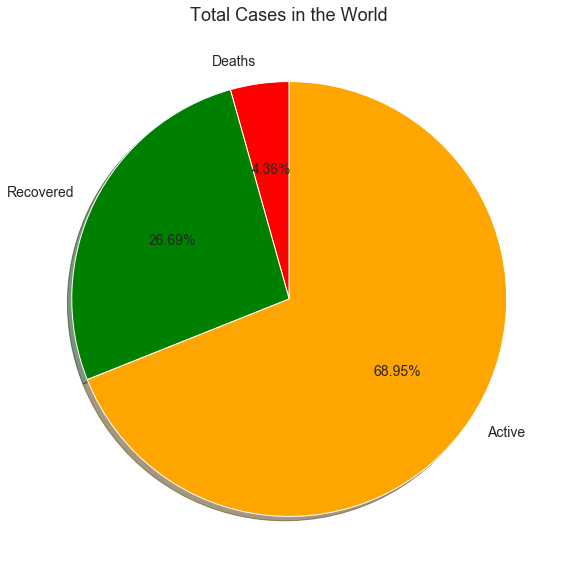

In [21]:
total_cases_pie(total_cases, 'Total Cases in the World')

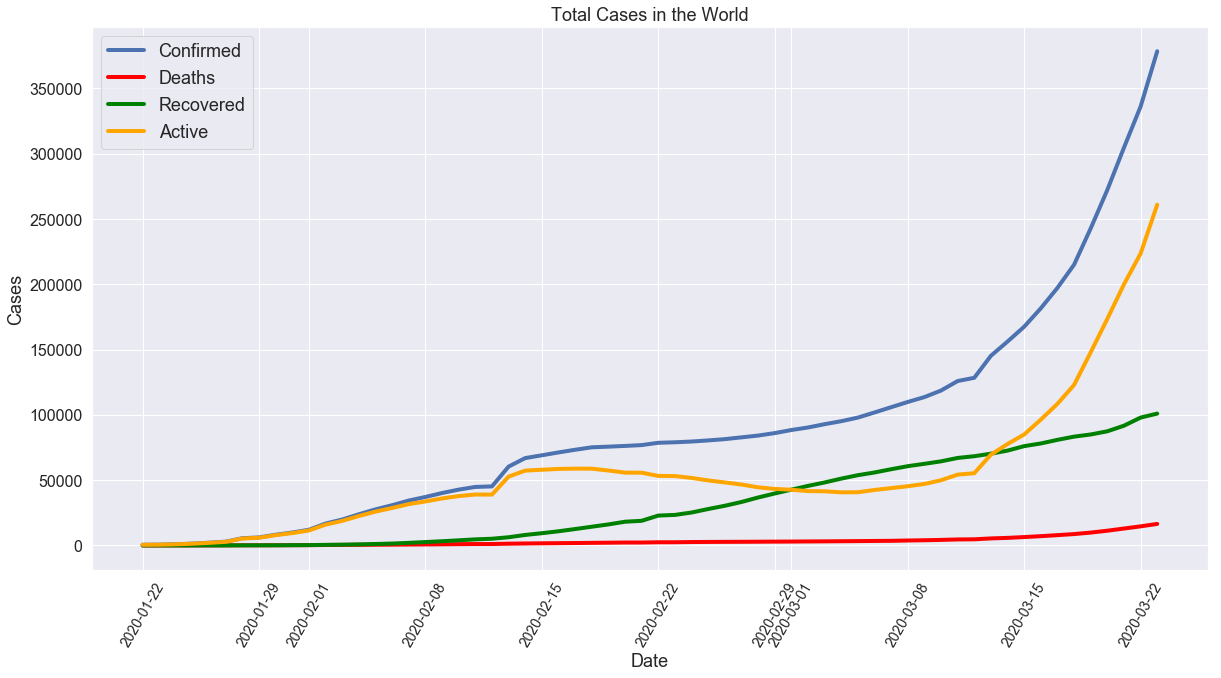

In [22]:
total_cases_lineplot(total_cases, 'Total Cases in the World')

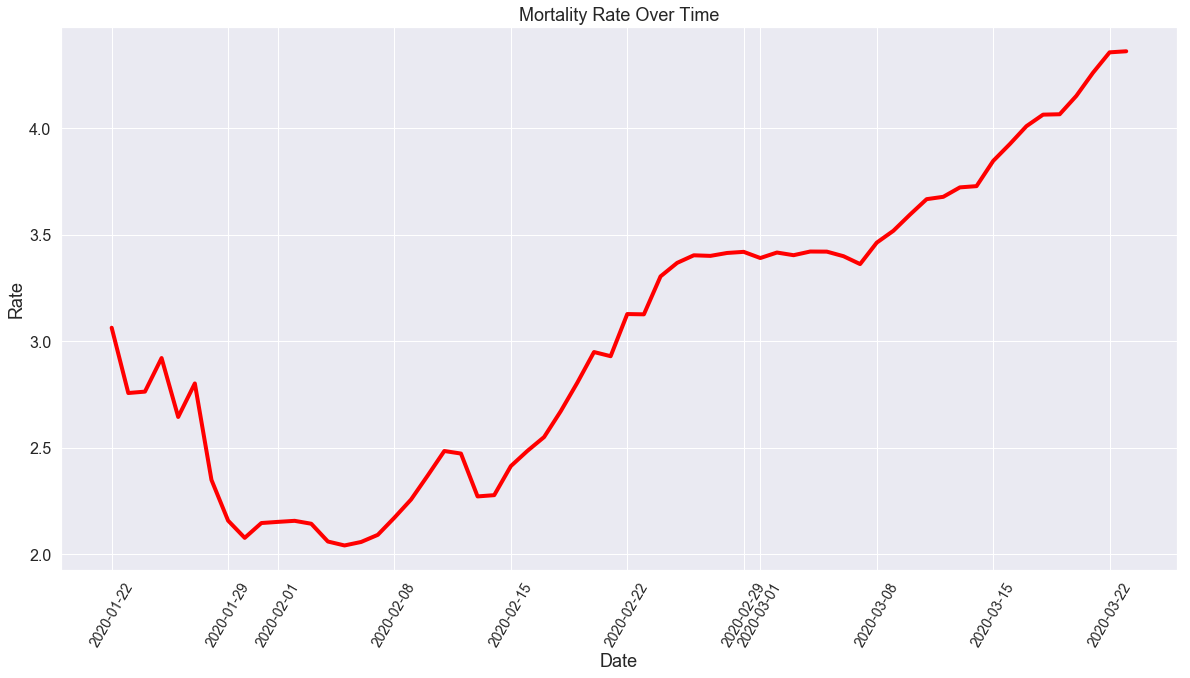

In [23]:
mortality_rate(total_cases, 'Mortality Rate Over Time')

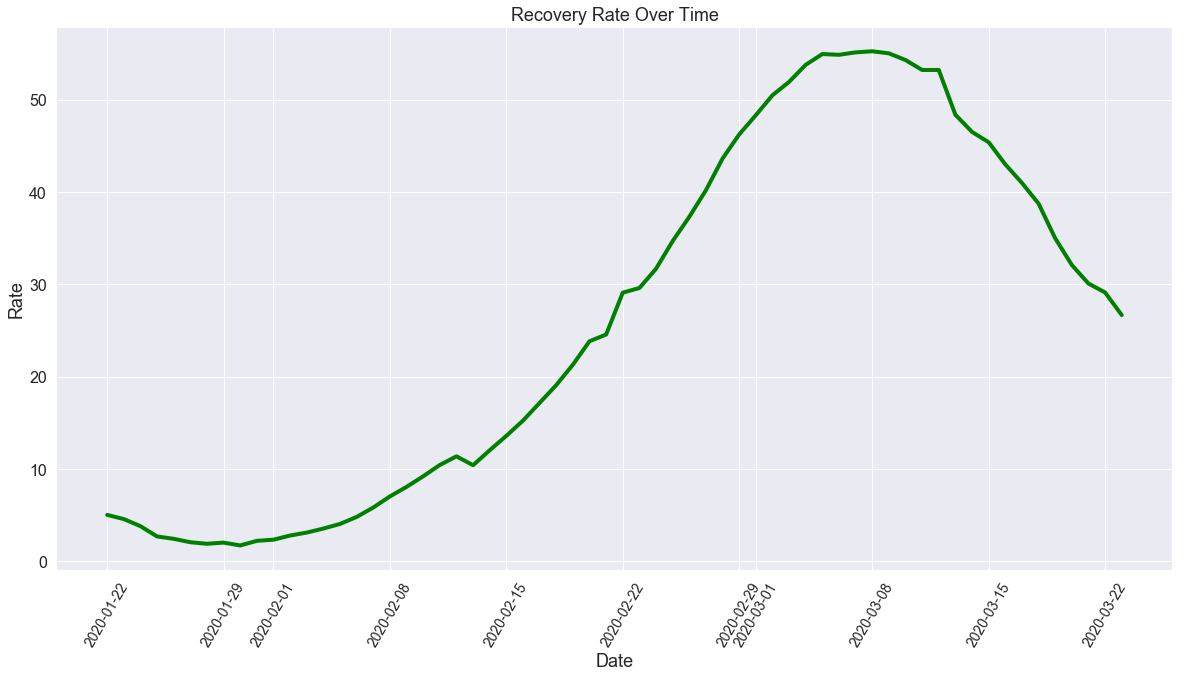

In [24]:
recovery_rate(total_cases, 'Recovery Rate Over Time')

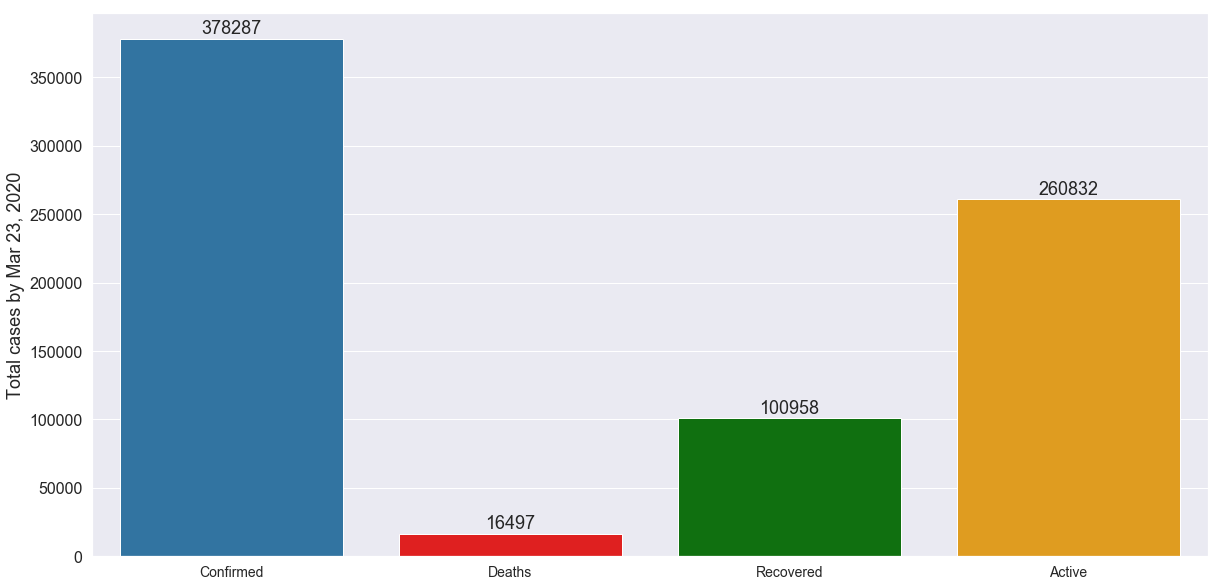

In [25]:
total_latest_barplot(total_cases)

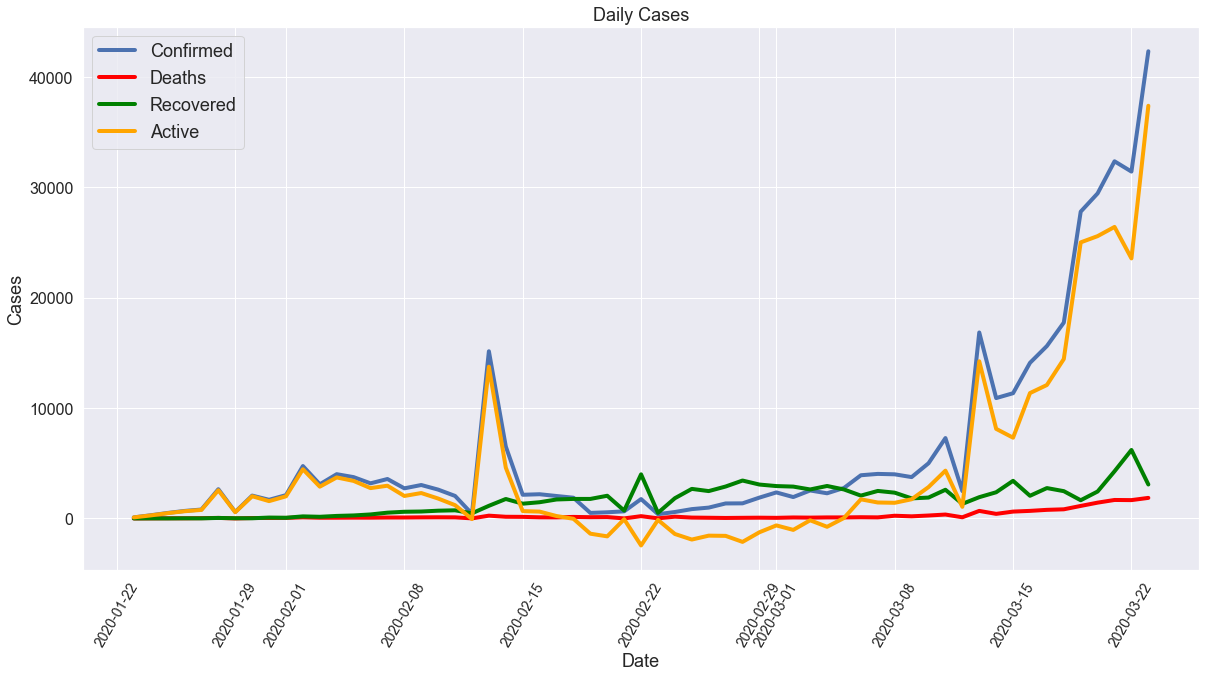

In [26]:
daily_cases(total_cases, 'Daily Cases')

### Top Country

In [27]:
latest = data[data['Observed'] == max(data['Observed'])]
total_per_country = latest.groupby(['Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()

In [28]:
top_num = 10
top_ten = total_per_country.sort_values('Confirmed', ascending=False)[:top_num]

print(f'Top {top_num} Countries:')
top_ten.style.background_gradient(cmap='Reds')

Top 10 Countries:


,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
China,81116,3270,72709,5137
Italy,63927,6077,7432,50418
United States,43667,552,0,43115
Spain,35136,2311,3355,29470
Germany,29056,123,453,28480
Iran,23049,1812,8376,12861
France,20123,862,2207,17054
South Korea,8961,111,3166,5684
Switzerland,8795,120,131,8544


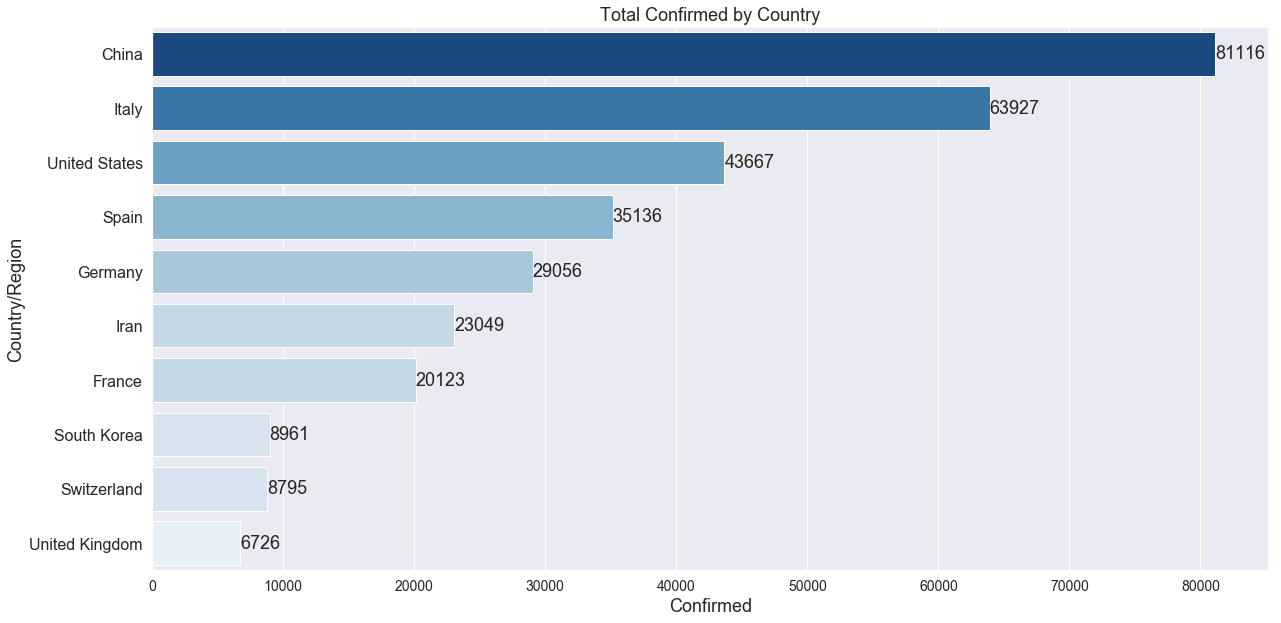

In [29]:
total_cases_by_country(top_ten, 'Confirmed', 'Blues_r')

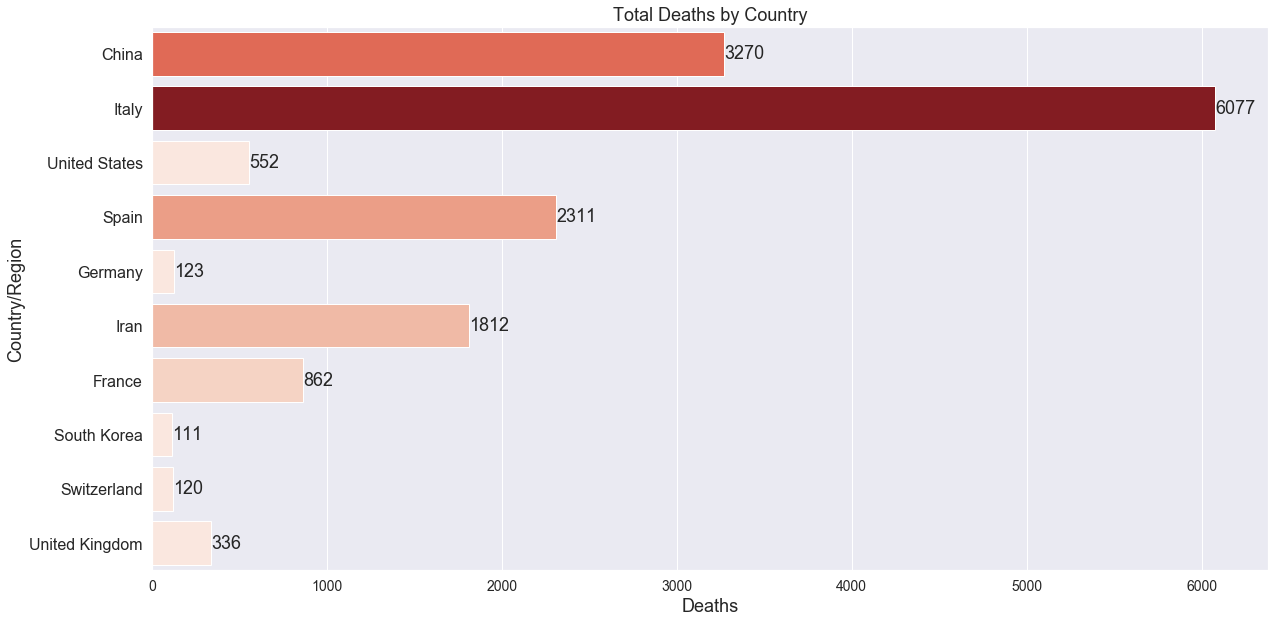

In [30]:
total_cases_by_country(top_ten, 'Deaths', 'Reds_r')

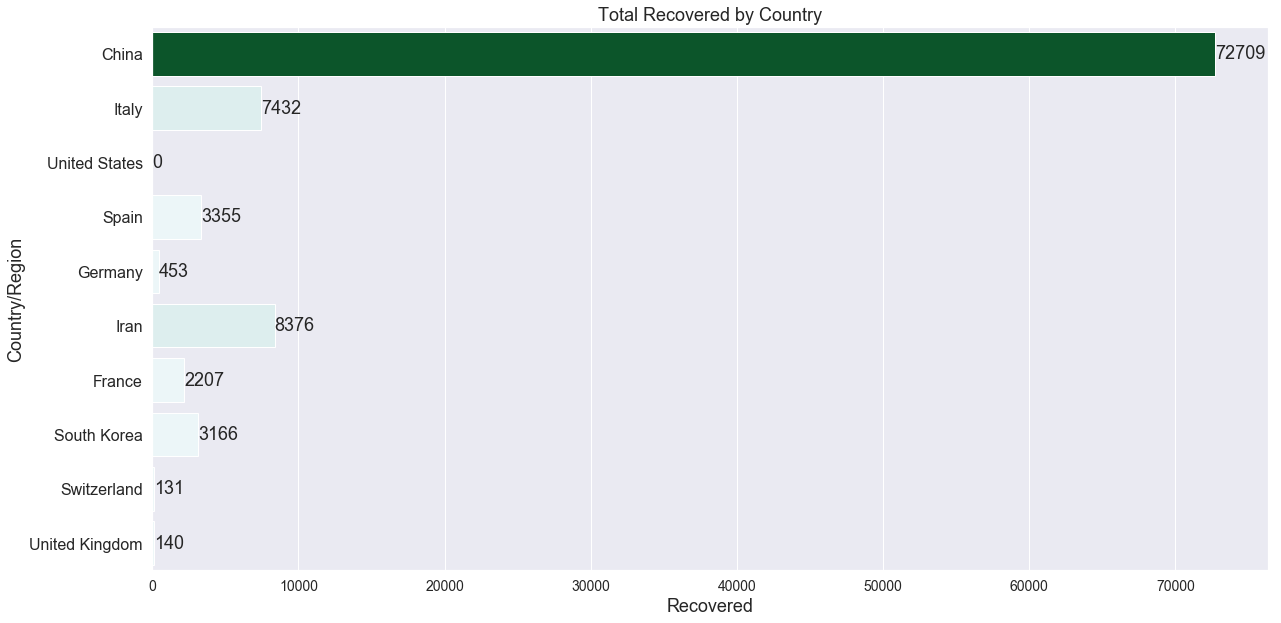

In [31]:
total_cases_by_country(top_ten, 'Recovered', 'BuGn_r')

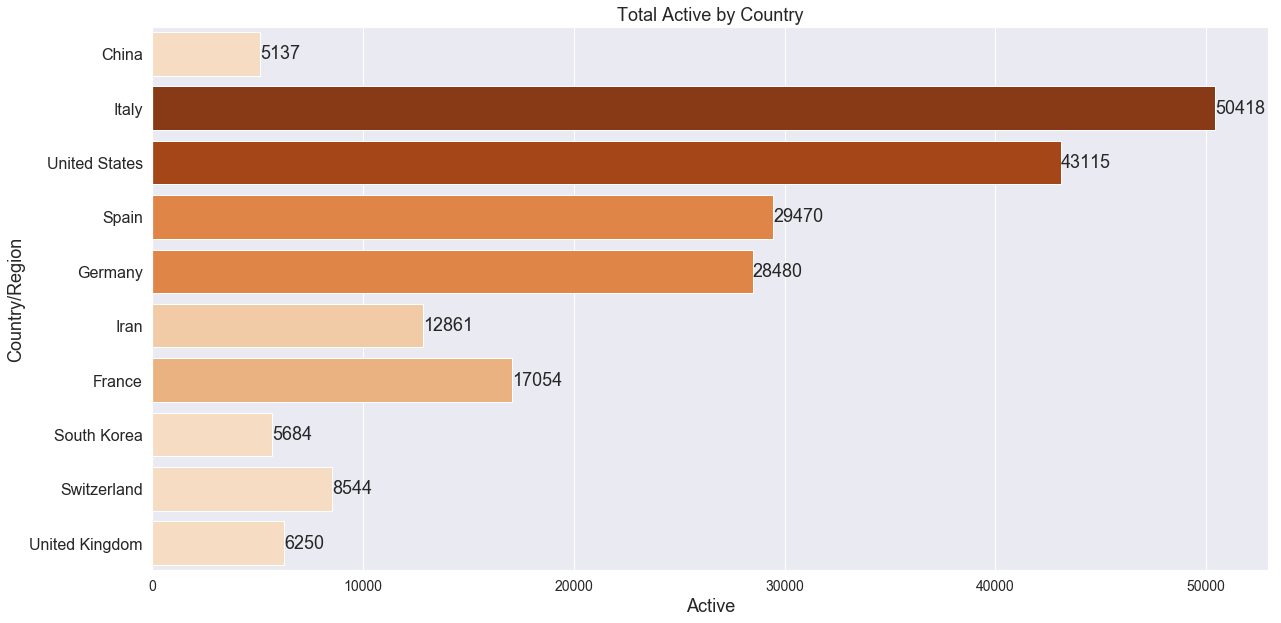

In [32]:
total_cases_by_country(top_ten, 'Active', 'Oranges_r')

## European Countries and Switzerland

In [33]:
italy = data[data['Country/Region'] == 'Italy']
spain = data[data['Country/Region'] == 'Spain']
germany = data[data['Country/Region'] == 'Germany']
france = data[data['Country/Region'] == 'France']
ch = data[data['Country/Region'] == 'Switzerland']
uk = data[data['Country/Region'] == 'United Kingdom']

### Italy

In [34]:
total_cases_italy = italy.sort_values('Observed').groupby(['Observed']).sum()

In [35]:
total_cases_italy\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-23 00:00:00,63927,6077,7432,50418
2020-03-22 00:00:00,59138,5476,7024,46638
2020-03-21 00:00:00,53578,4825,6072,42681
2020-03-20 00:00:00,47021,4032,4440,38549
2020-03-19 00:00:00,41035,3405,4440,33190
2020-03-18 00:00:00,35713,2978,4025,28710
2020-03-17 00:00:00,31506,2503,2941,26062
2020-03-16 00:00:00,27980,2158,2749,23073
2020-03-15 00:00:00,24747,1809,2335,20603


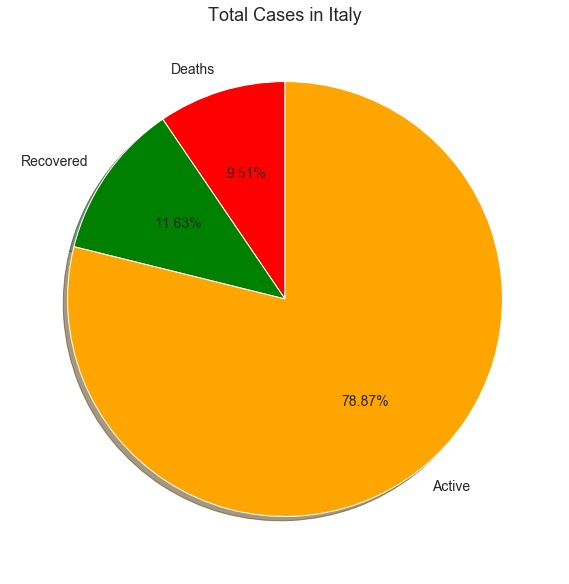

In [36]:
total_cases_pie(total_cases_italy, 'Total Cases in Italy')

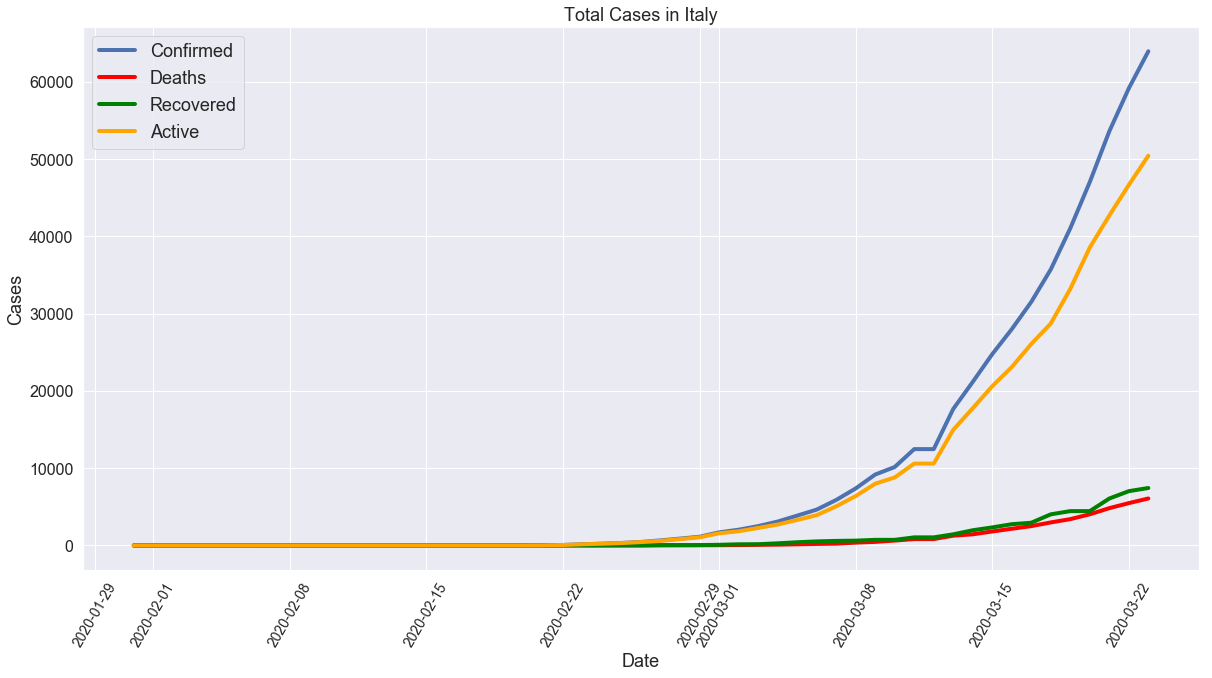

In [37]:
total_cases_lineplot(total_cases_italy, 'Total Cases in Italy')

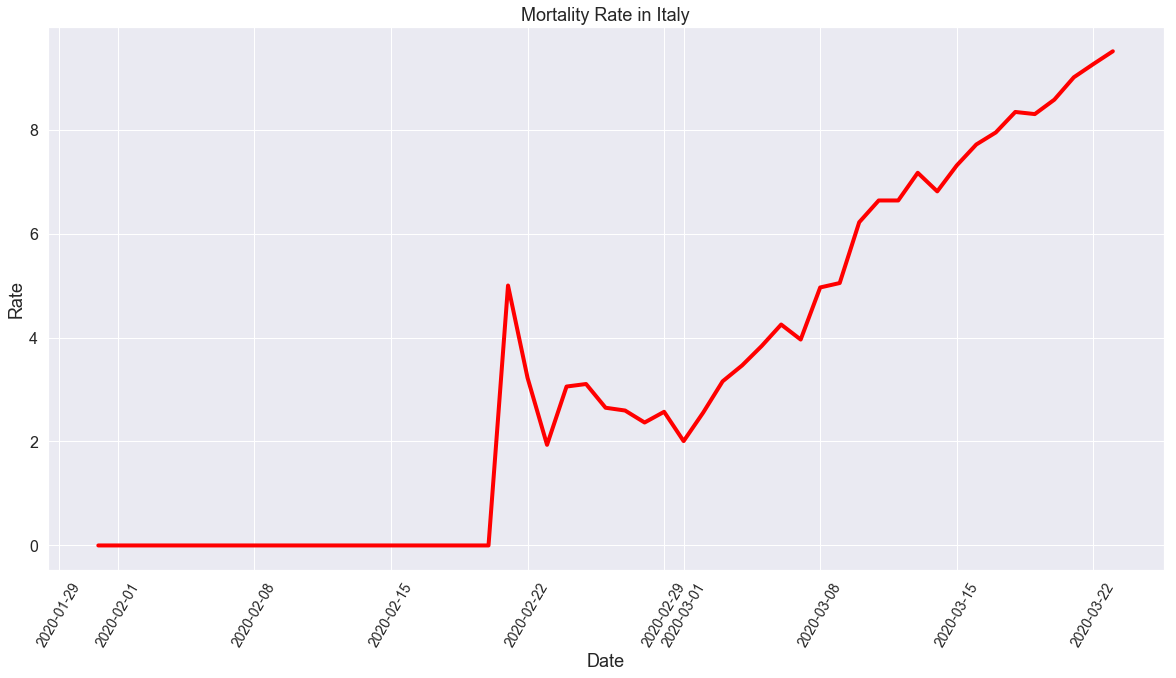

In [38]:
mortality_rate(total_cases_italy, 'Mortality Rate in Italy')

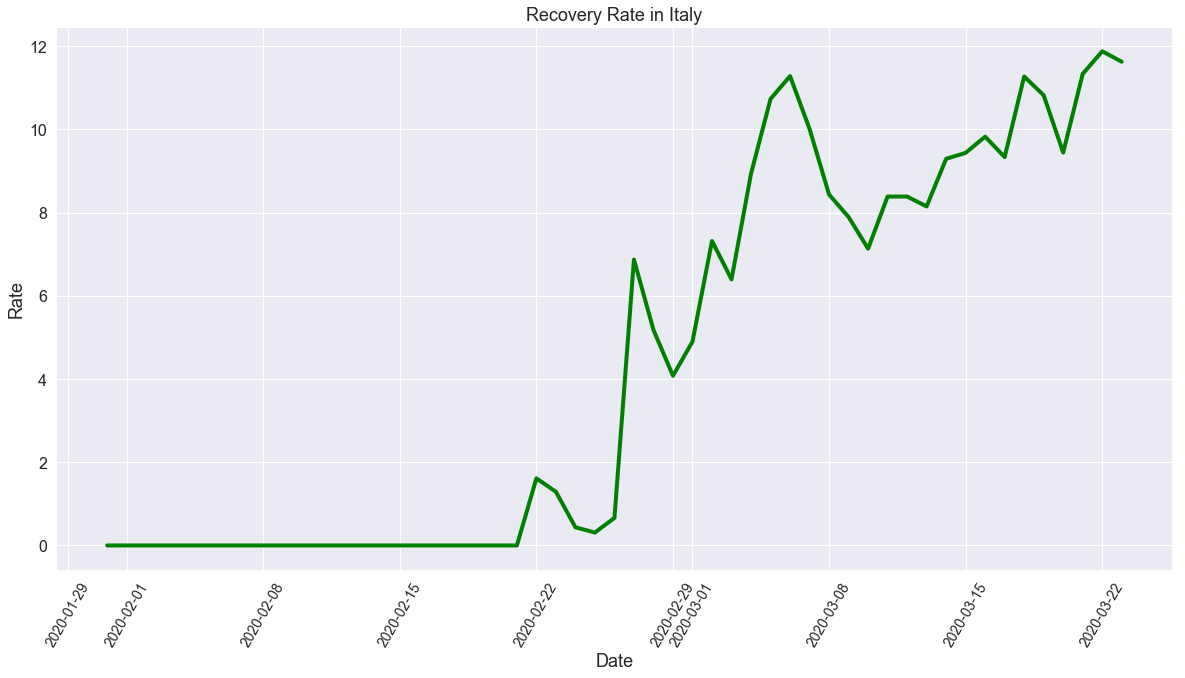

In [39]:
recovery_rate(total_cases_italy, 'Recovery Rate in Italy')

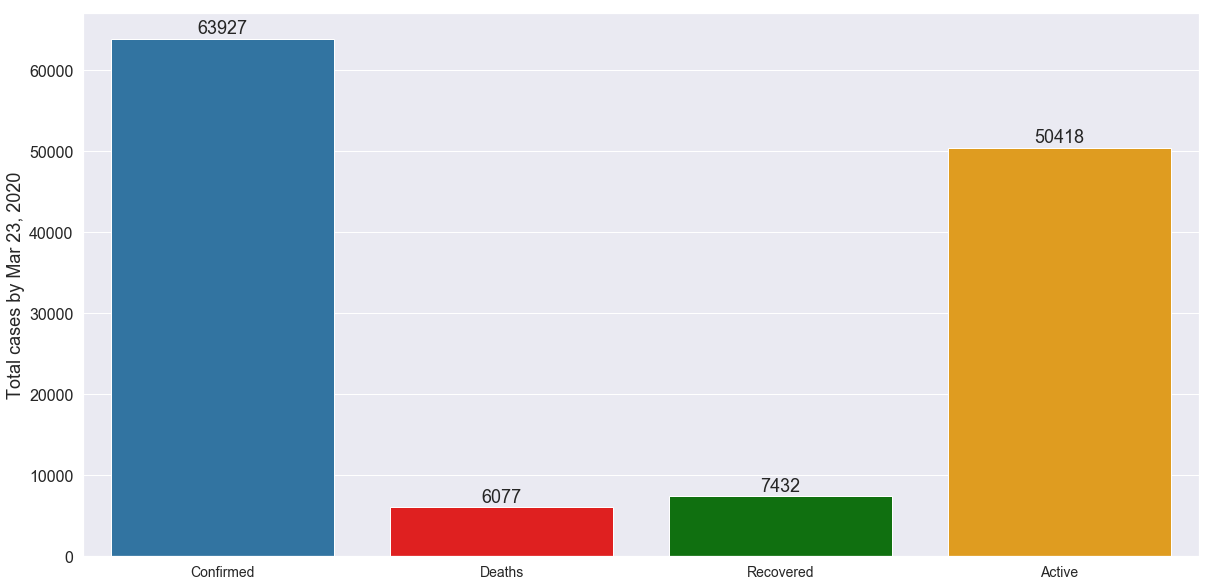

In [40]:
total_latest_barplot(total_cases_italy)

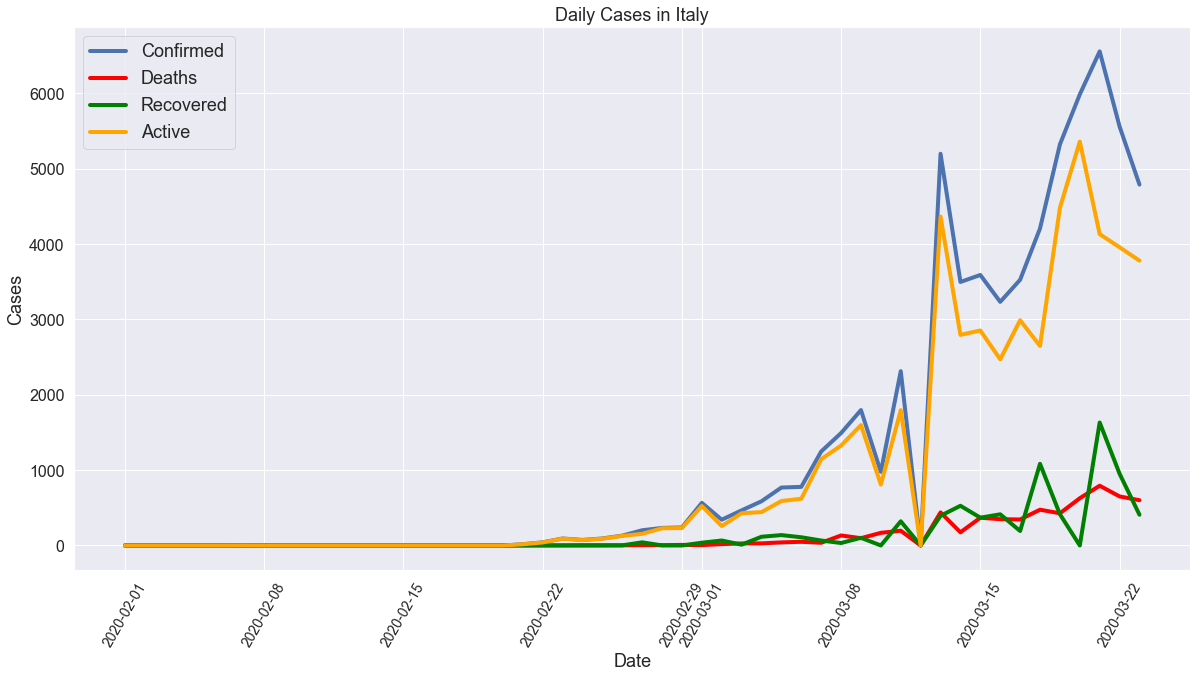

In [41]:
daily_cases(total_cases_italy, 'Daily Cases in Italy')

### Spain

In [42]:
total_cases_spain = spain.sort_values('Observed').groupby(['Observed']).sum()

In [43]:
total_cases_spain\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-23 00:00:00,35136,2311,3355,29470
2020-03-22 00:00:00,28768,1772,2575,24421
2020-03-21 00:00:00,25374,1375,2125,21874
2020-03-20 00:00:00,20410,1043,1588,17779
2020-03-19 00:00:00,17963,830,1107,16026
2020-03-18 00:00:00,13910,623,1081,12206
2020-03-17 00:00:00,11748,533,1028,10187
2020-03-16 00:00:00,9942,342,530,9070
2020-03-15 00:00:00,7798,289,517,6992


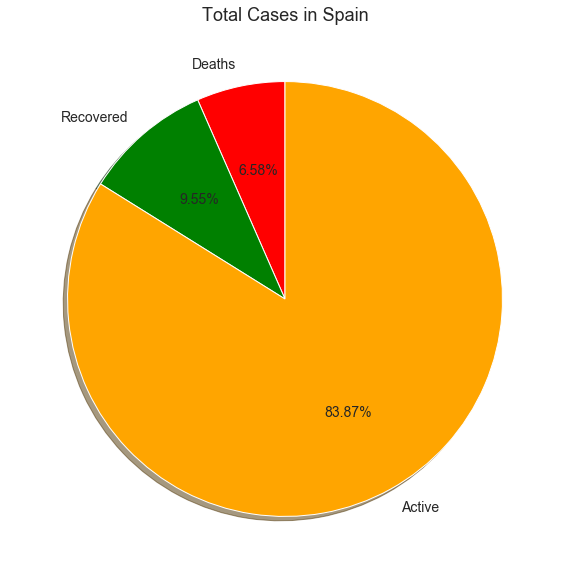

In [44]:
total_cases_pie(total_cases_spain, 'Total Cases in Spain')

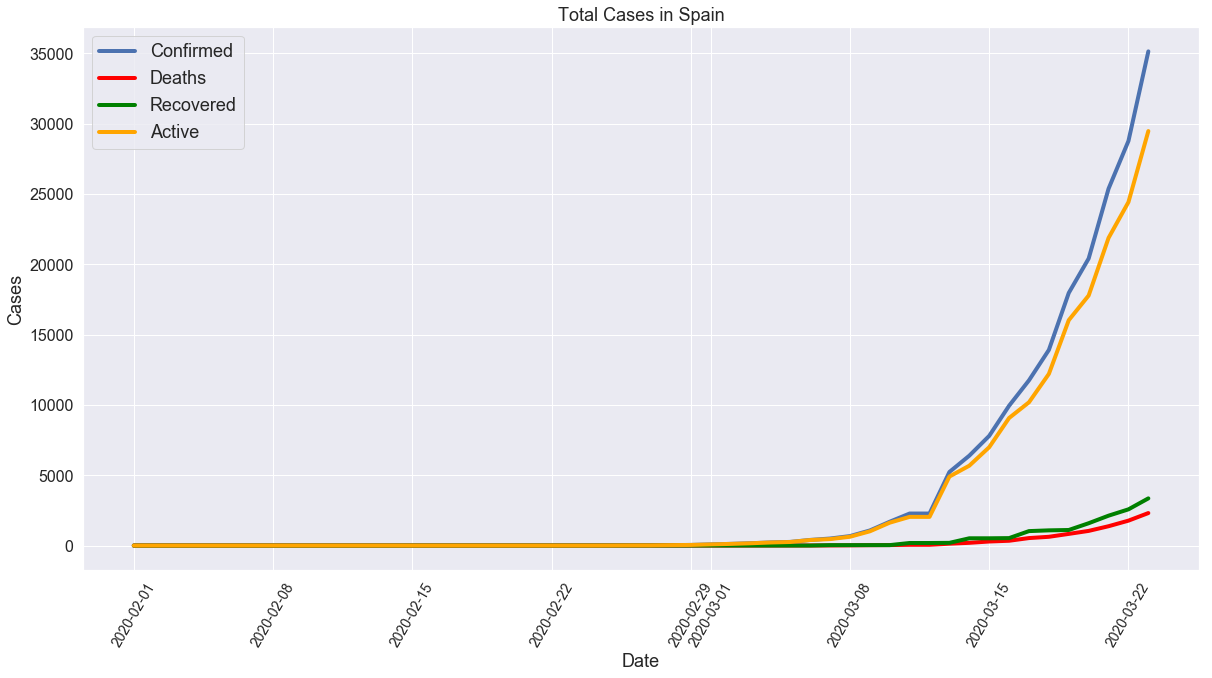

In [45]:
total_cases_lineplot(total_cases_spain, 'Total Cases in Spain')

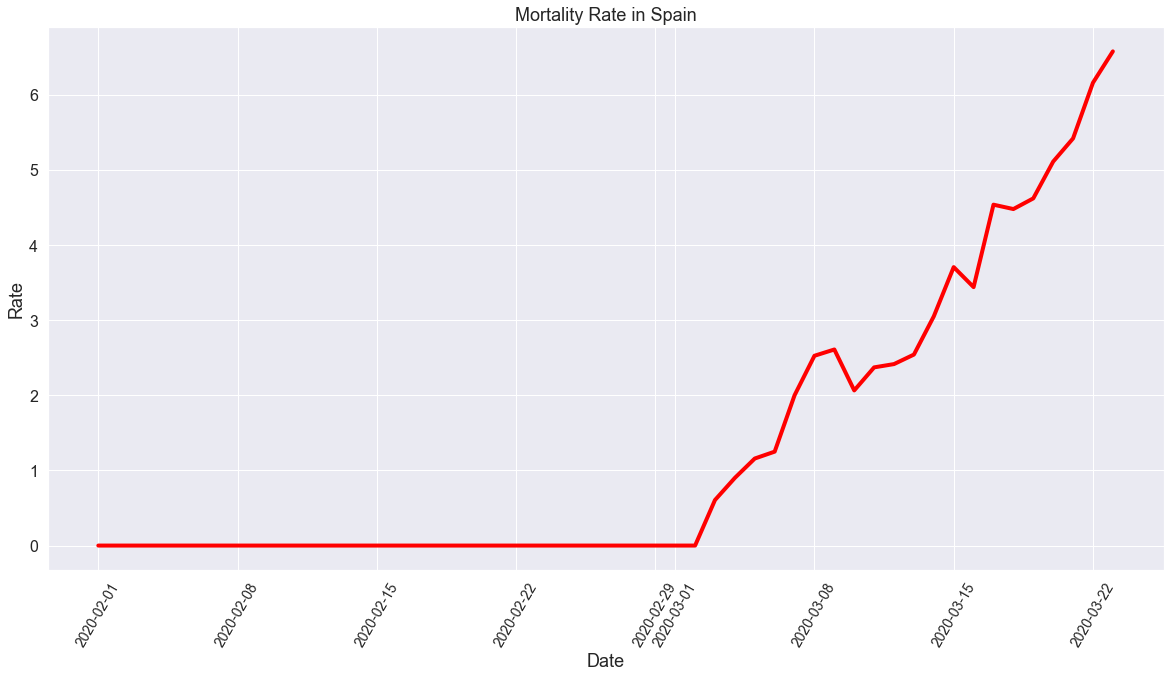

In [46]:
mortality_rate(total_cases_spain, 'Mortality Rate in Spain')

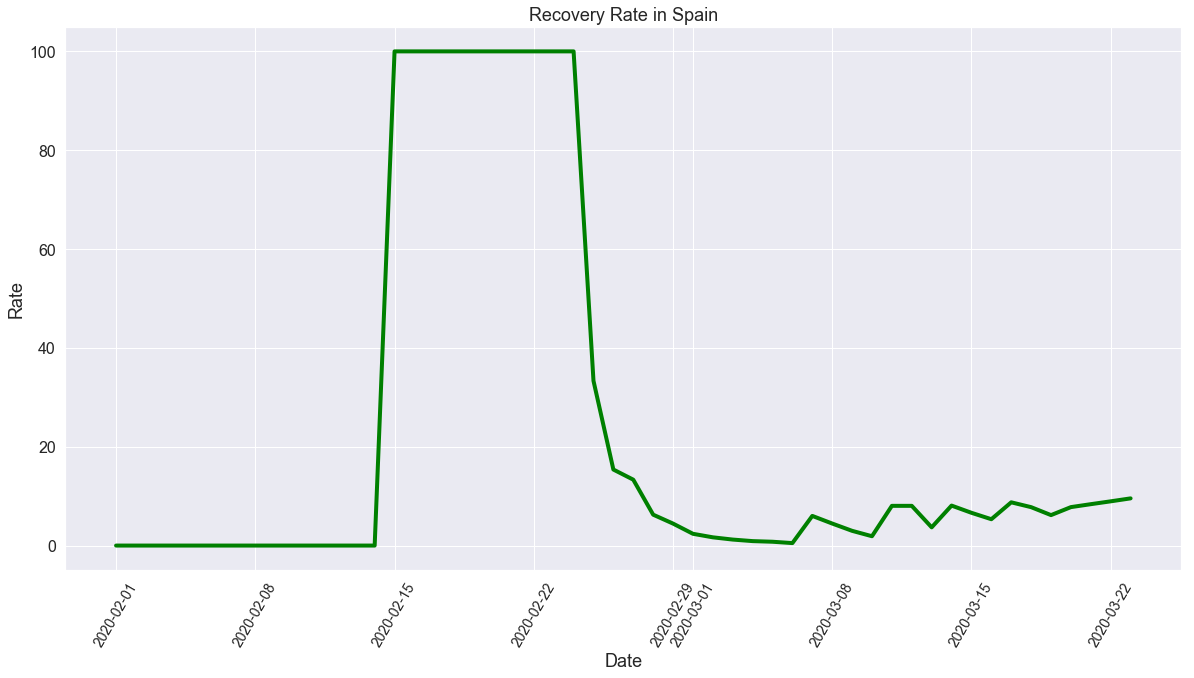

In [47]:
recovery_rate(total_cases_spain, 'Recovery Rate in Spain')

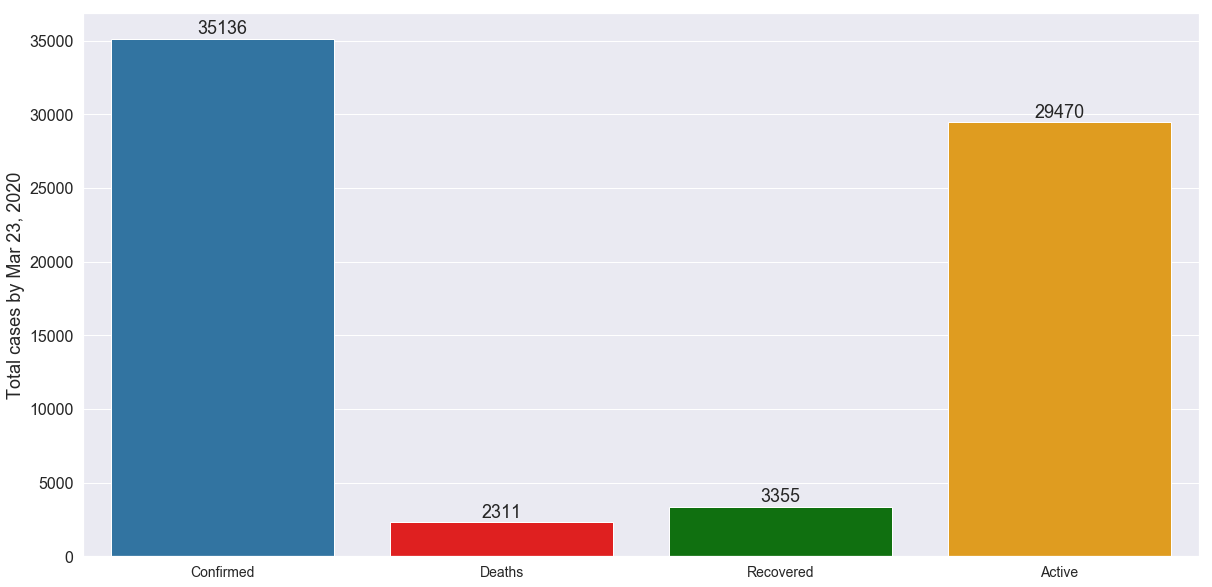

In [48]:
total_latest_barplot(total_cases_spain)

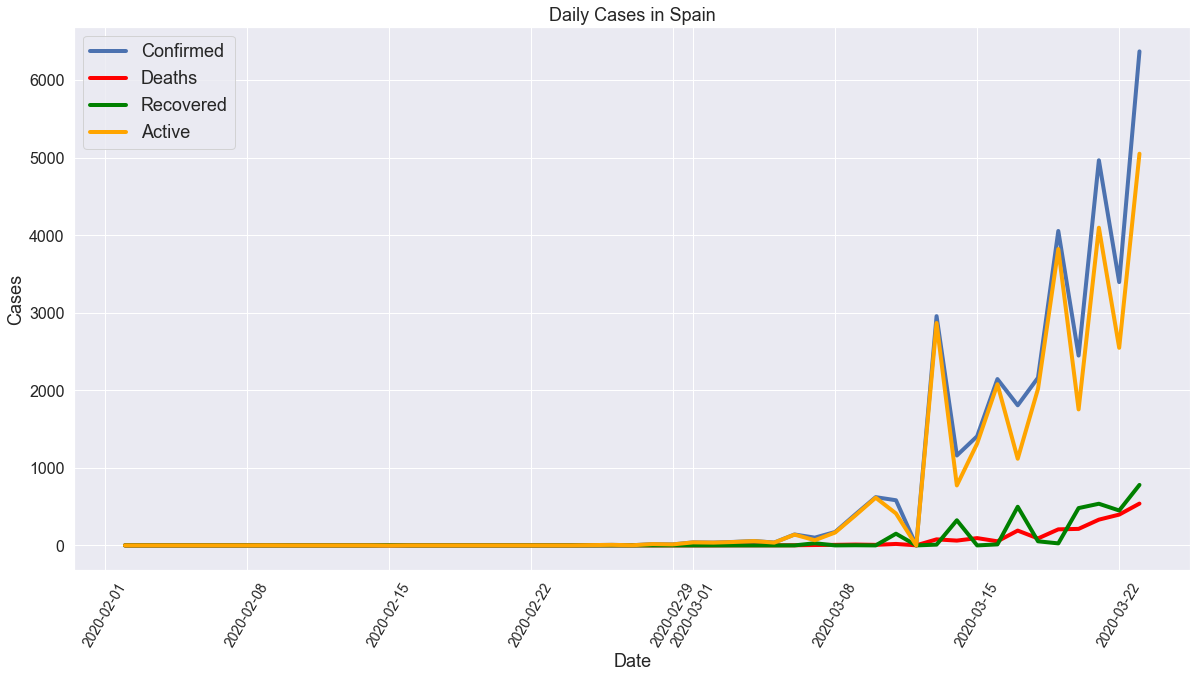

In [49]:
daily_cases(total_cases_spain, 'Daily Cases in Spain')

### Germany

In [50]:
total_cases_germany = germany.sort_values('Observed').groupby(['Observed']).sum()

In [51]:
total_cases_germany\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-23 00:00:00,29056,123,453,28480
2020-03-22 00:00:00,24873,94,266,24513
2020-03-21 00:00:00,22213,84,233,21896
2020-03-20 00:00:00,19848,67,180,19601
2020-03-19 00:00:00,15320,44,113,15163
2020-03-18 00:00:00,12327,28,105,12194
2020-03-17 00:00:00,9257,24,67,9166
2020-03-16 00:00:00,7272,17,67,7188
2020-03-15 00:00:00,5795,11,46,5738


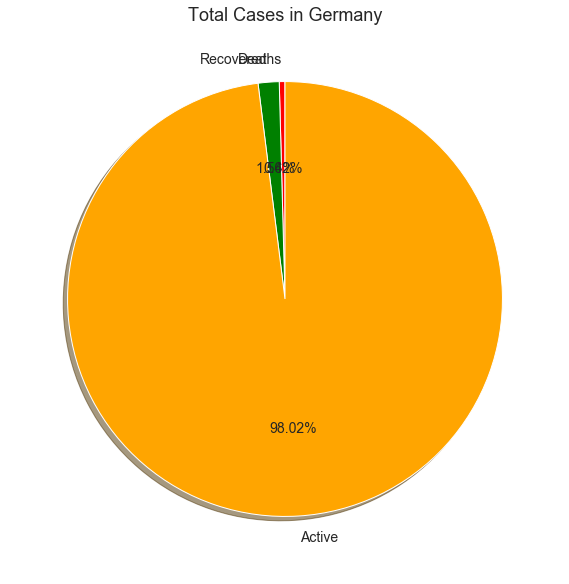

In [52]:
total_cases_pie(total_cases_germany, 'Total Cases in Germany')

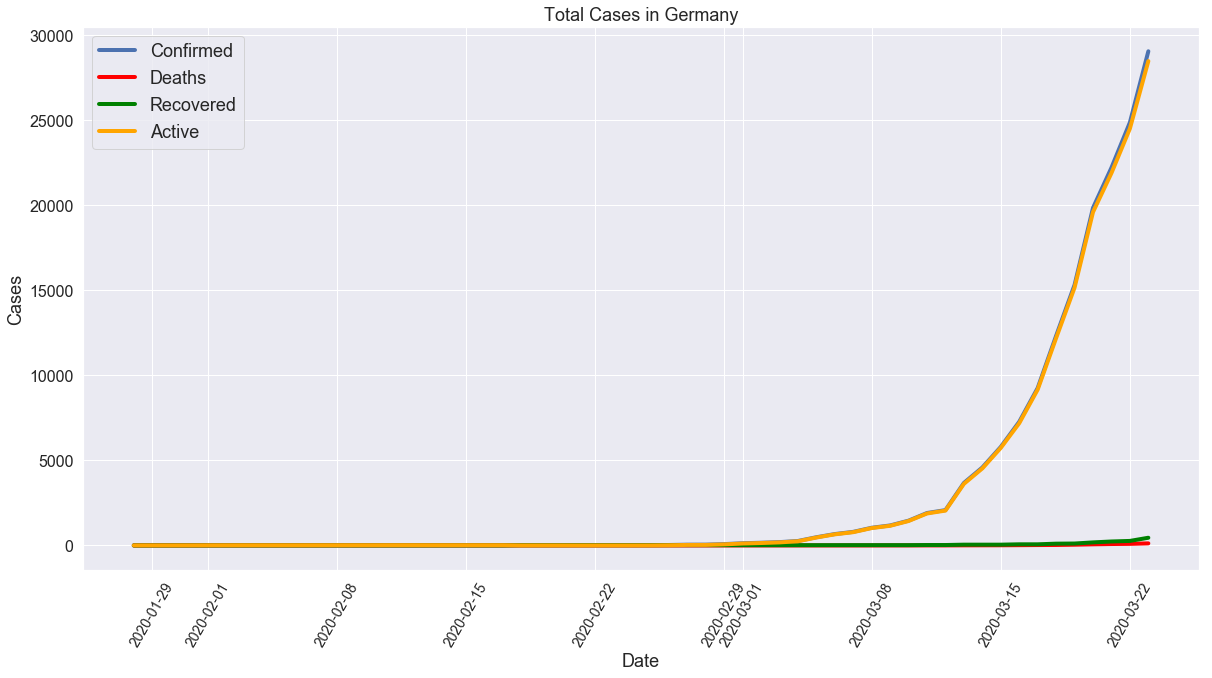

In [53]:
total_cases_lineplot(total_cases_germany, 'Total Cases in Germany')

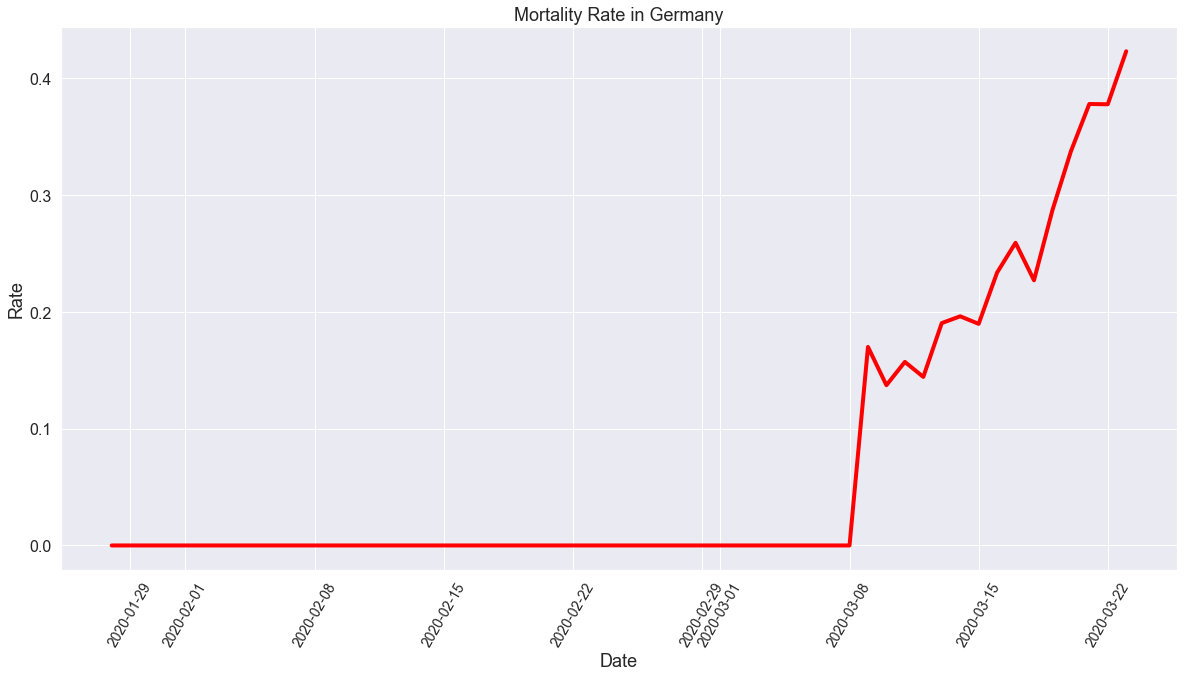

In [54]:
mortality_rate(total_cases_germany, 'Mortality Rate in Germany')

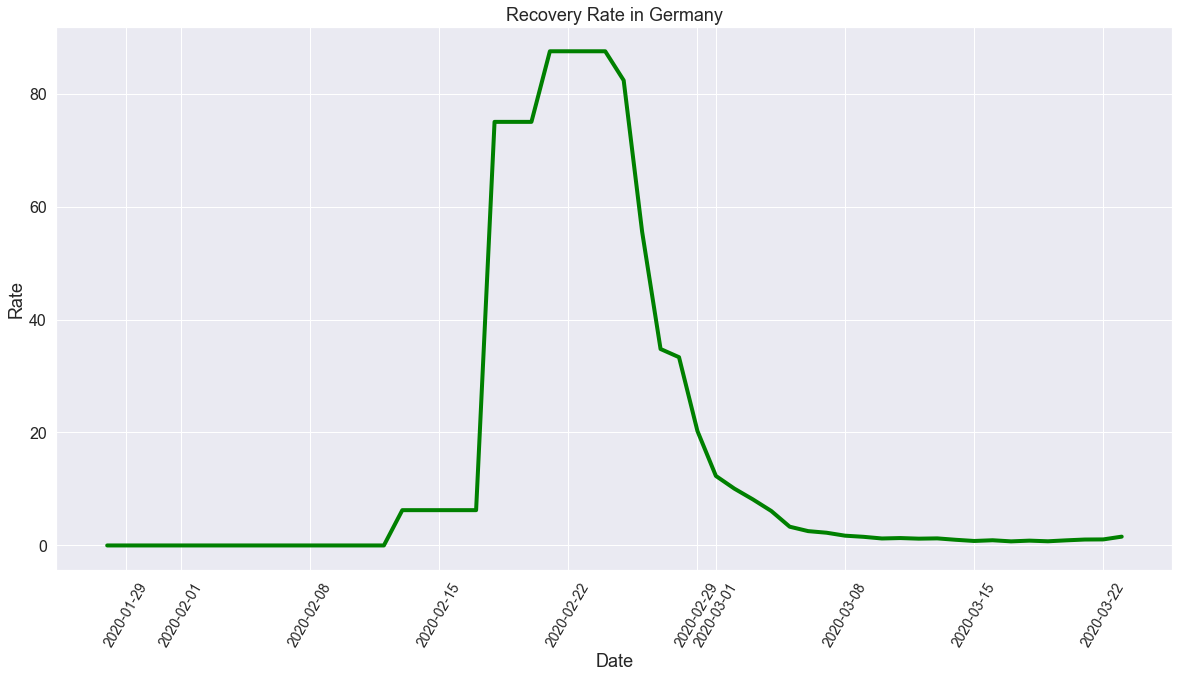

In [55]:
recovery_rate(total_cases_germany, 'Recovery Rate in Germany')

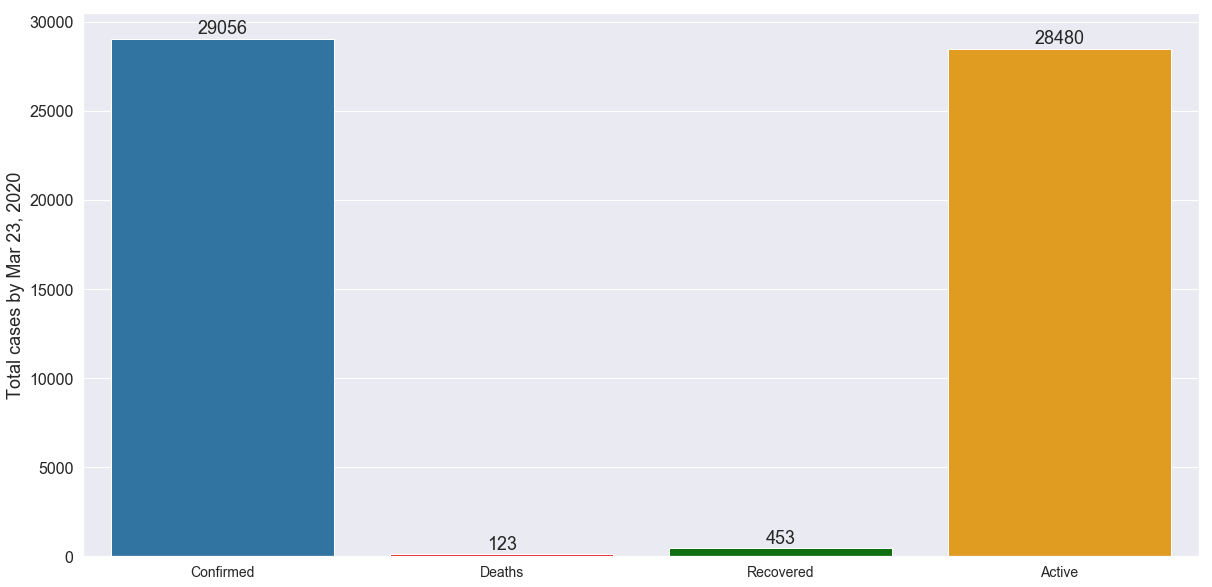

In [56]:
total_latest_barplot(total_cases_germany)

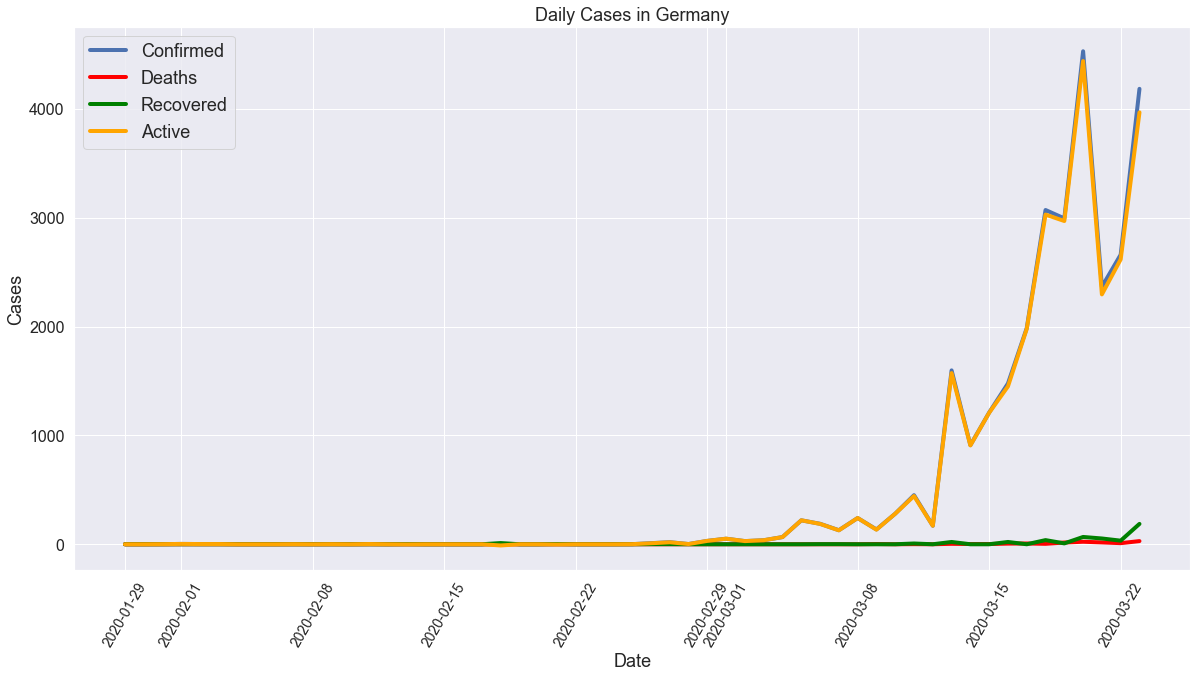

In [57]:
daily_cases(total_cases_germany, 'Daily Cases in Germany')

### France

In [58]:
total_cases_france = france.sort_values('Observed').groupby(['Observed']).sum()

In [59]:
total_cases_france\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-23 00:00:00,20123,862,2207,17054
2020-03-22 00:00:00,16044,674,2200,13170
2020-03-21 00:00:00,14308,562,12,13734
2020-03-20 00:00:00,12632,450,12,12170
2020-03-19 00:00:00,10886,243,12,10631
2020-03-18 00:00:00,9052,148,12,8892
2020-03-17 00:00:00,7683,148,12,7523
2020-03-16 00:00:00,6650,148,12,6490
2020-03-15 00:00:00,4513,91,12,4410


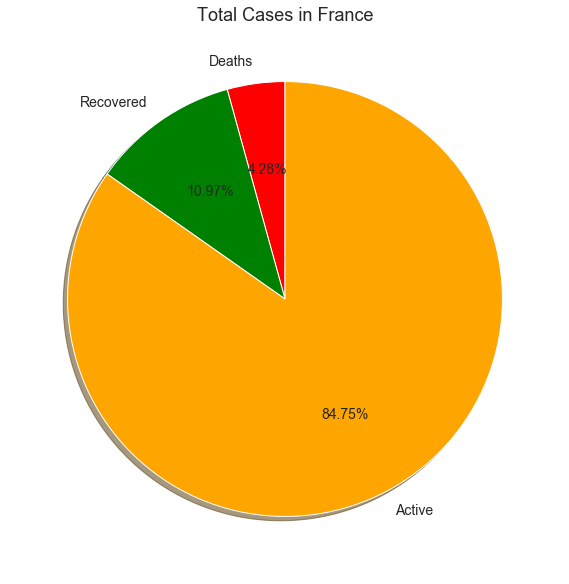

In [60]:
total_cases_pie(total_cases_france, 'Total Cases in France')

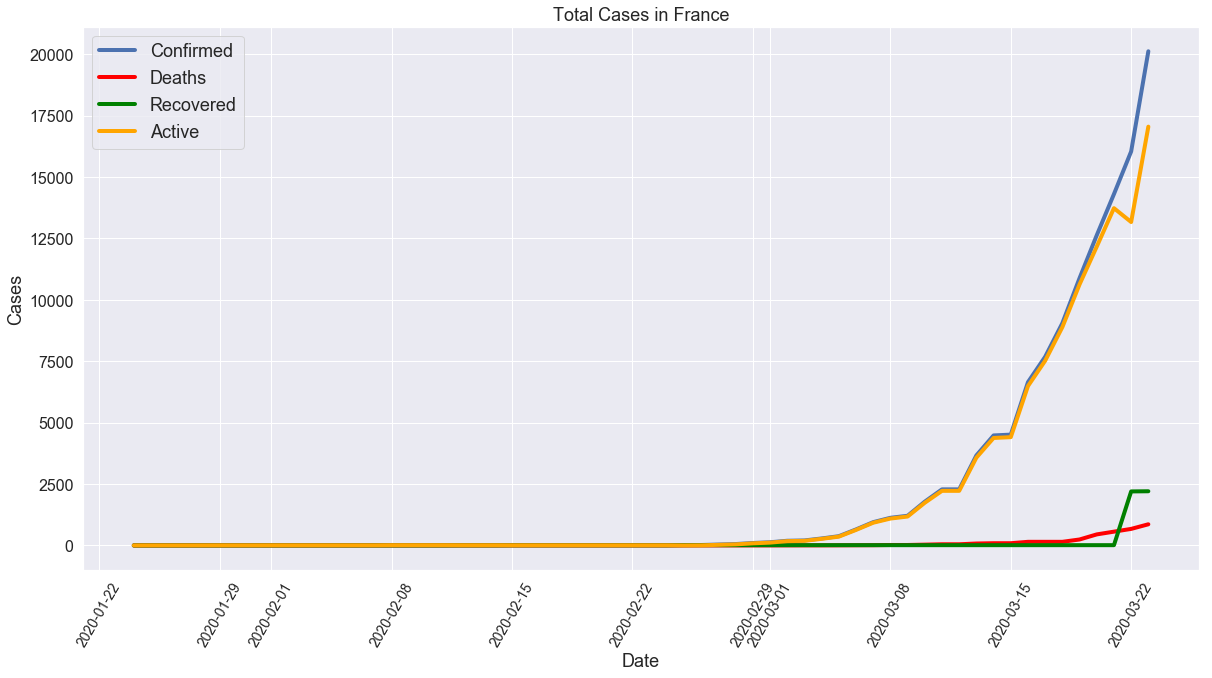

In [61]:
total_cases_lineplot(total_cases_france, 'Total Cases in France')

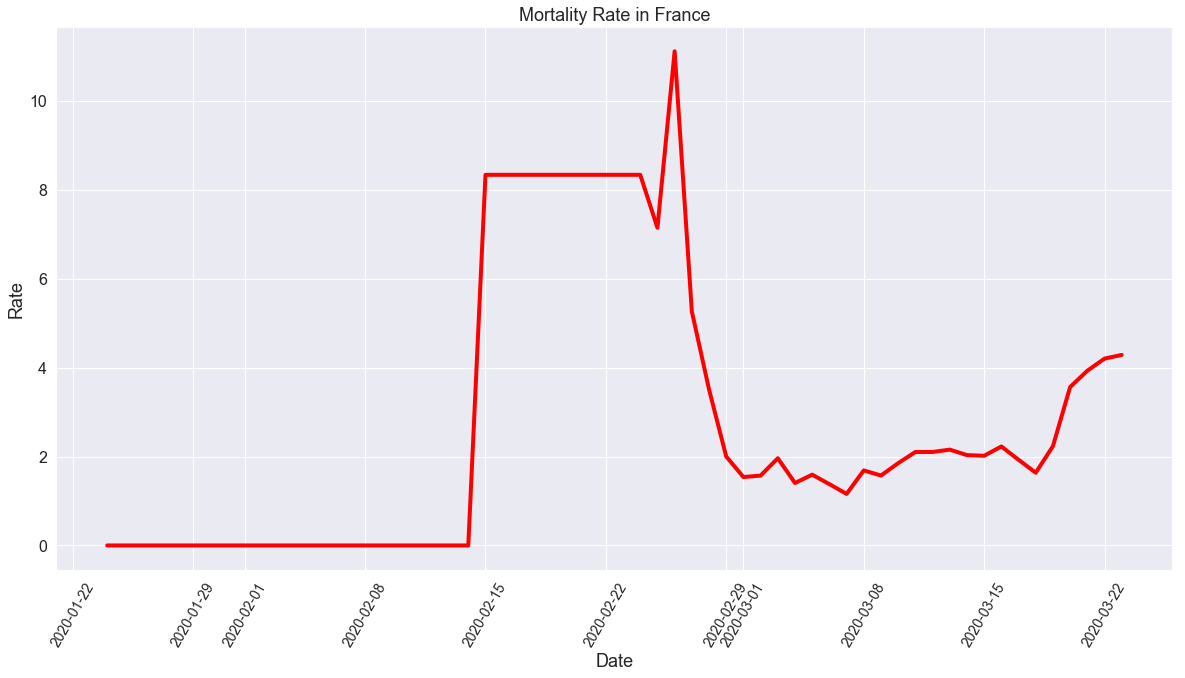

In [62]:
mortality_rate(total_cases_france, 'Mortality Rate in France')

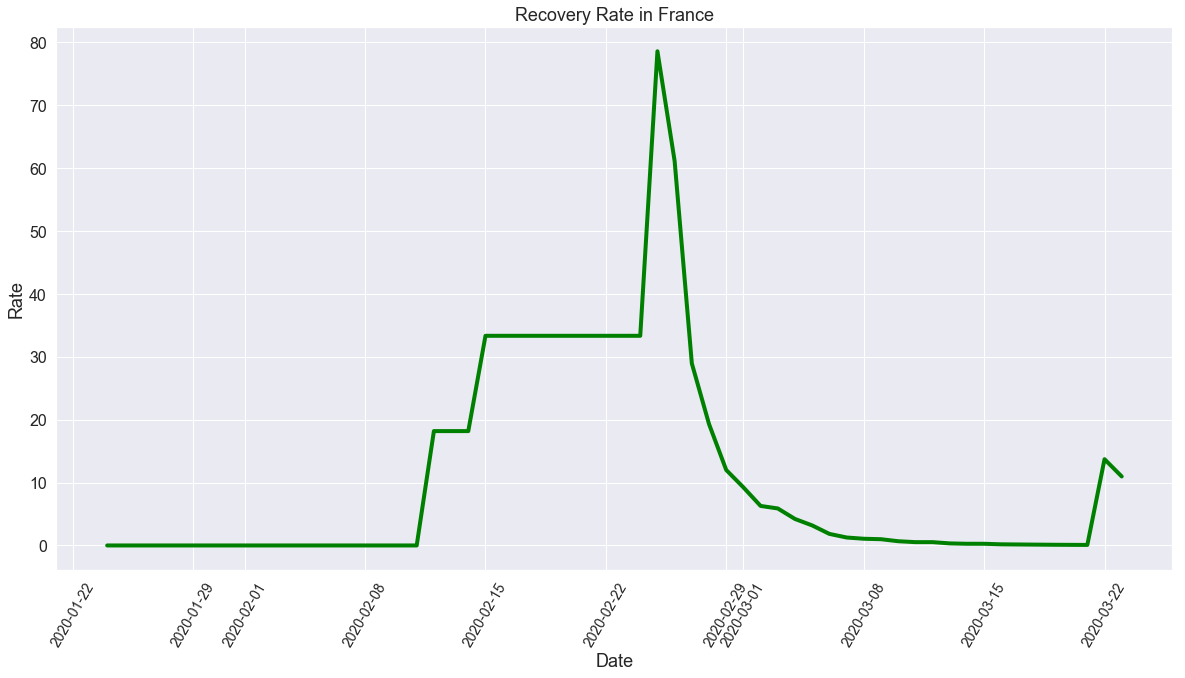

In [63]:
recovery_rate(total_cases_france, 'Recovery Rate in France')

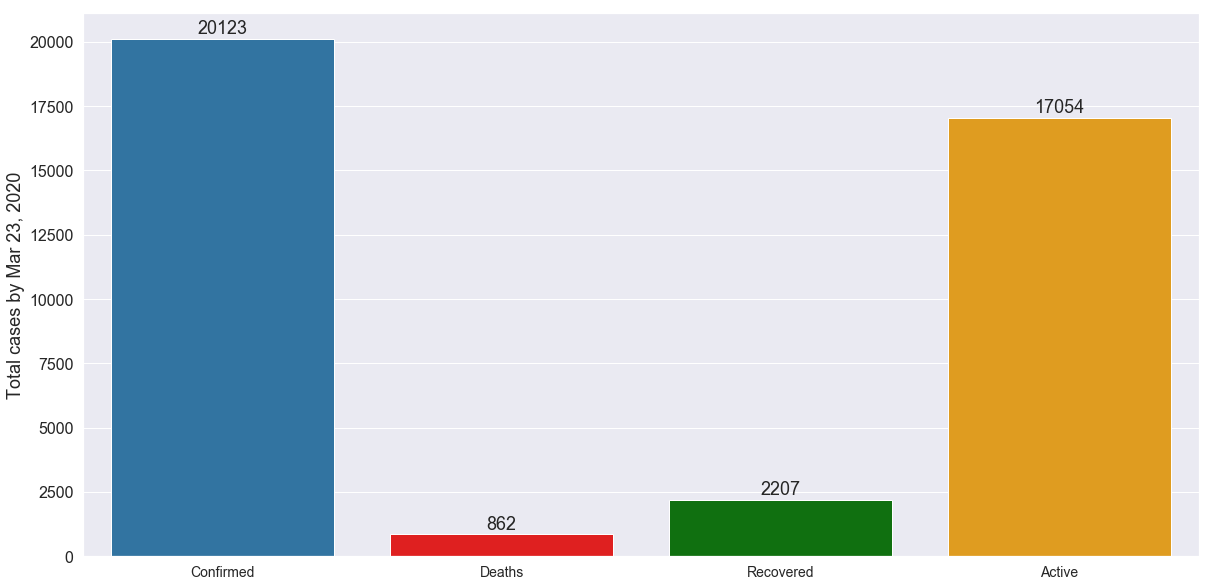

In [64]:
total_latest_barplot(total_cases_france)

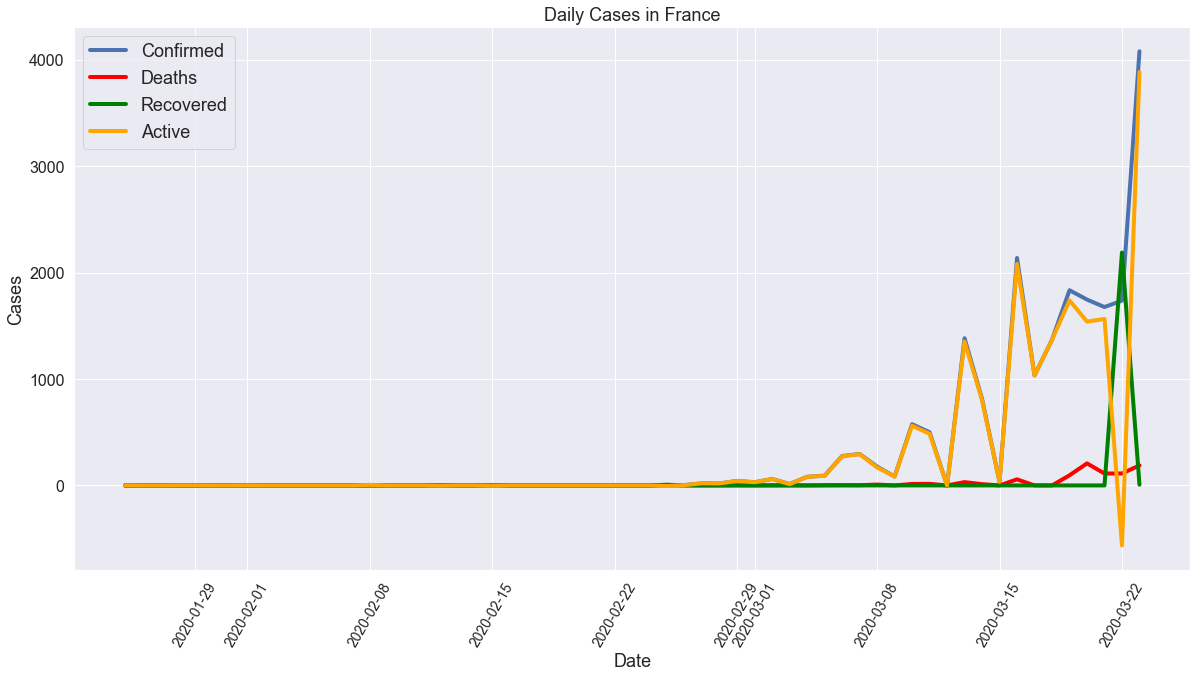

In [65]:
daily_cases(total_cases_france, 'Daily Cases in France')

### United Kingdom

In [66]:
total_cases_uk = uk.sort_values('Observed').groupby(['Observed']).sum()

In [67]:
total_cases_uk\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-23 00:00:00,6726,336,140,6250
2020-03-22 00:00:00,5741,282,67,5392
2020-03-21 00:00:00,5067,234,67,4766
2020-03-20 00:00:00,4014,178,67,3769
2020-03-19 00:00:00,2716,138,67,2511
2020-03-18 00:00:00,2642,72,67,2503
2020-03-17 00:00:00,1960,56,53,1851
2020-03-16 00:00:00,1551,56,21,1474
2020-03-15 00:00:00,1144,21,19,1104


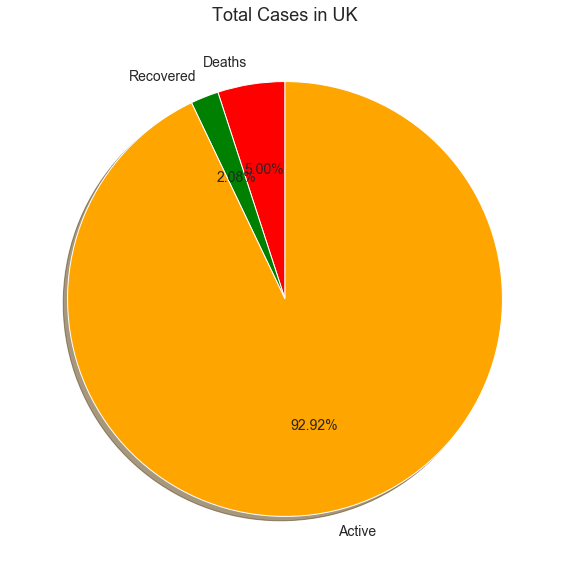

In [68]:
total_cases_pie(total_cases_uk, 'Total Cases in UK')

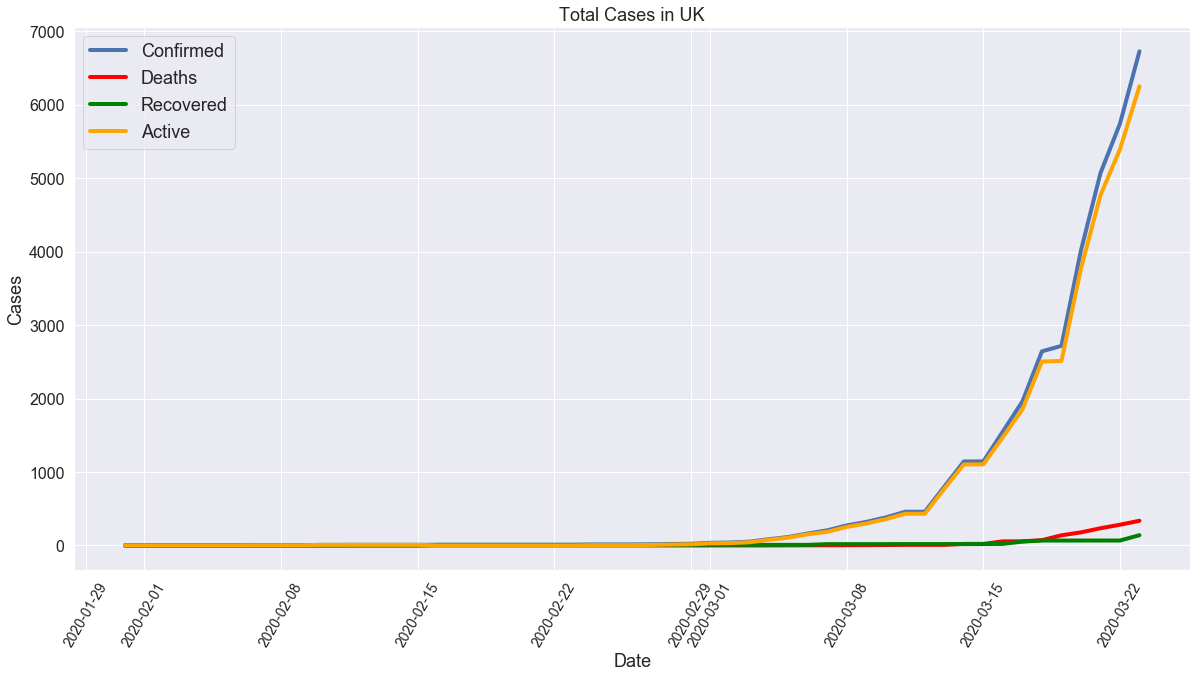

In [69]:
total_cases_lineplot(total_cases_uk, 'Total Cases in UK')

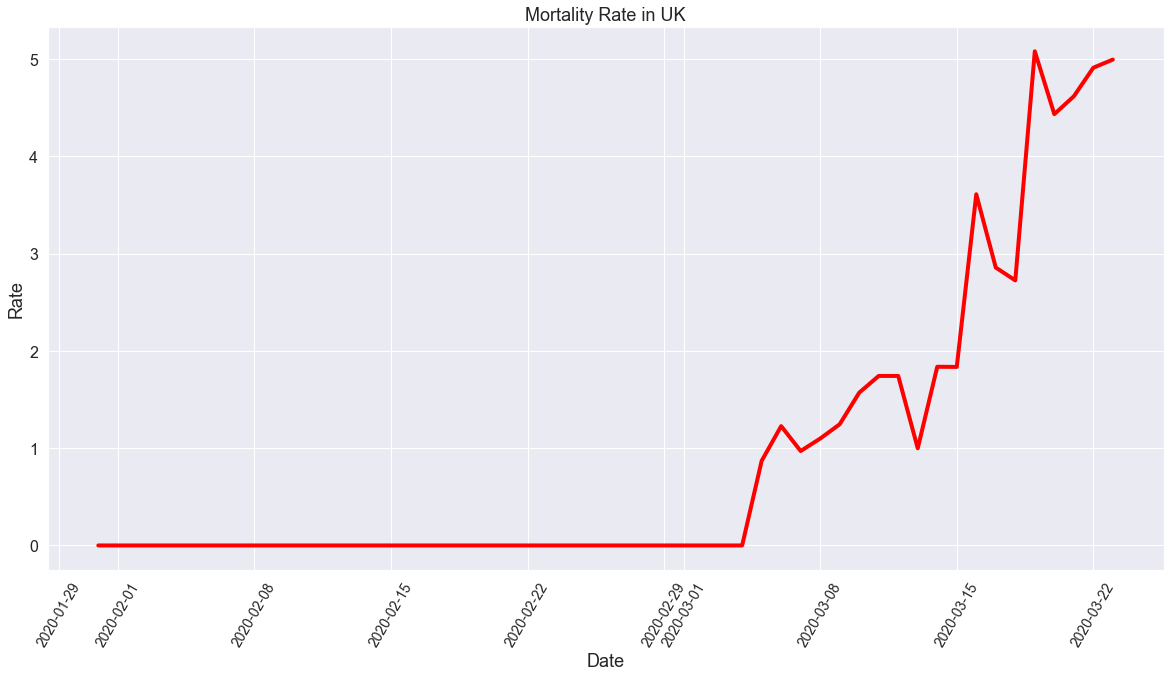

In [70]:
mortality_rate(total_cases_uk, 'Mortality Rate in UK')

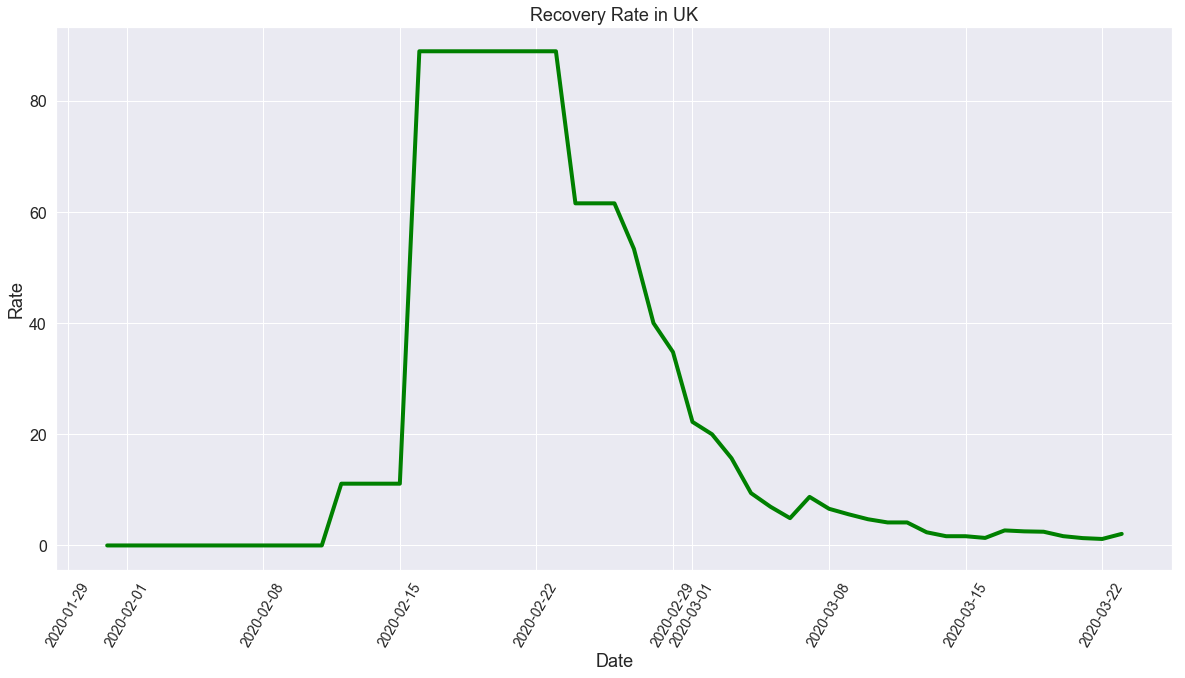

In [71]:
recovery_rate(total_cases_uk, 'Recovery Rate in UK')

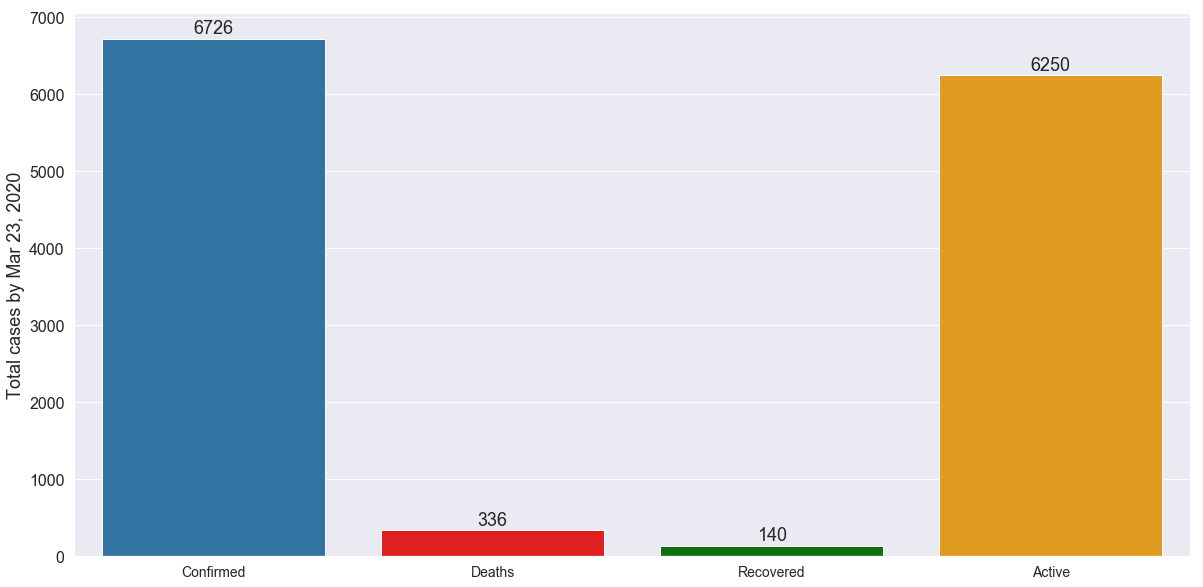

In [72]:
total_latest_barplot(total_cases_uk)

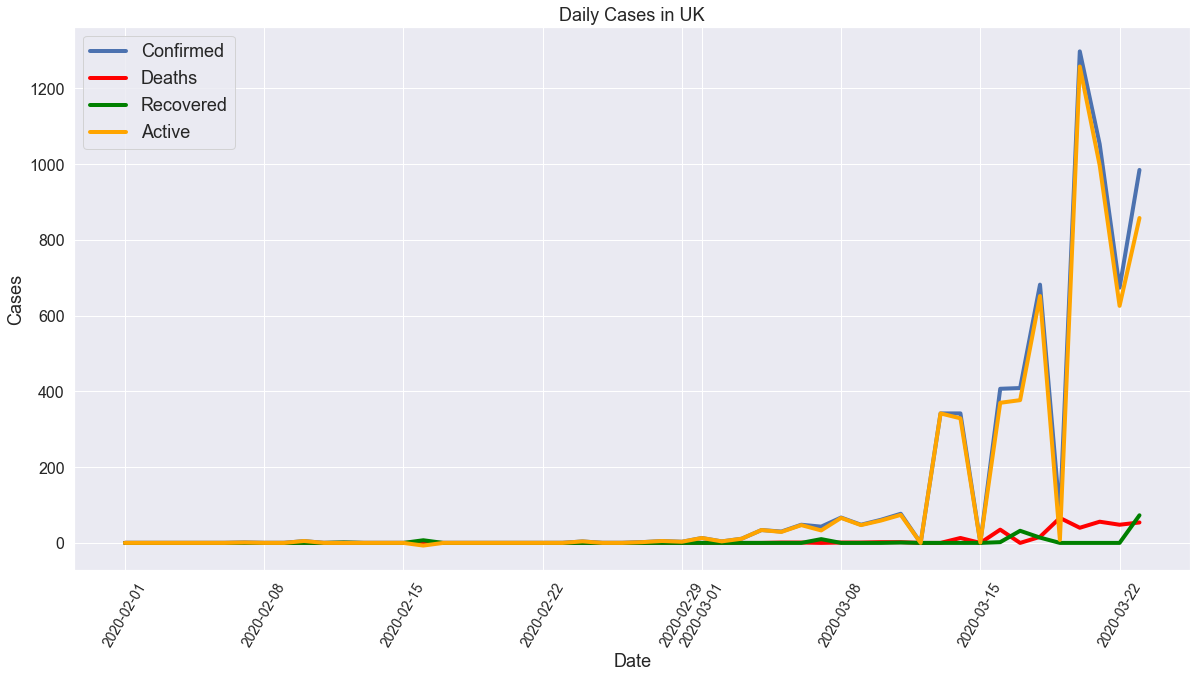

In [73]:
daily_cases(total_cases_uk, 'Daily Cases in UK')

### Switzerland

In [74]:
total_cases_ch = ch.sort_values('Observed').groupby(['Observed']).sum()

In [75]:
total_cases_ch\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-23 00:00:00,8795,120,131,8544
2020-03-22 00:00:00,7245,98,131,7016
2020-03-21 00:00:00,6575,75,15,6485
2020-03-20 00:00:00,5294,54,15,5225
2020-03-19 00:00:00,4075,41,15,4019
2020-03-18 00:00:00,3028,28,15,2985
2020-03-17 00:00:00,2700,27,4,2669
2020-03-16 00:00:00,2200,14,4,2182
2020-03-15 00:00:00,2200,14,4,2182


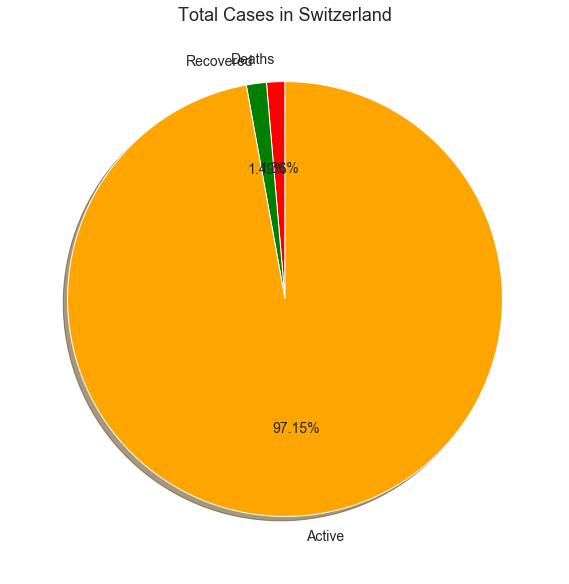

In [76]:
total_cases_pie(total_cases_ch, 'Total Cases in Switzerland')

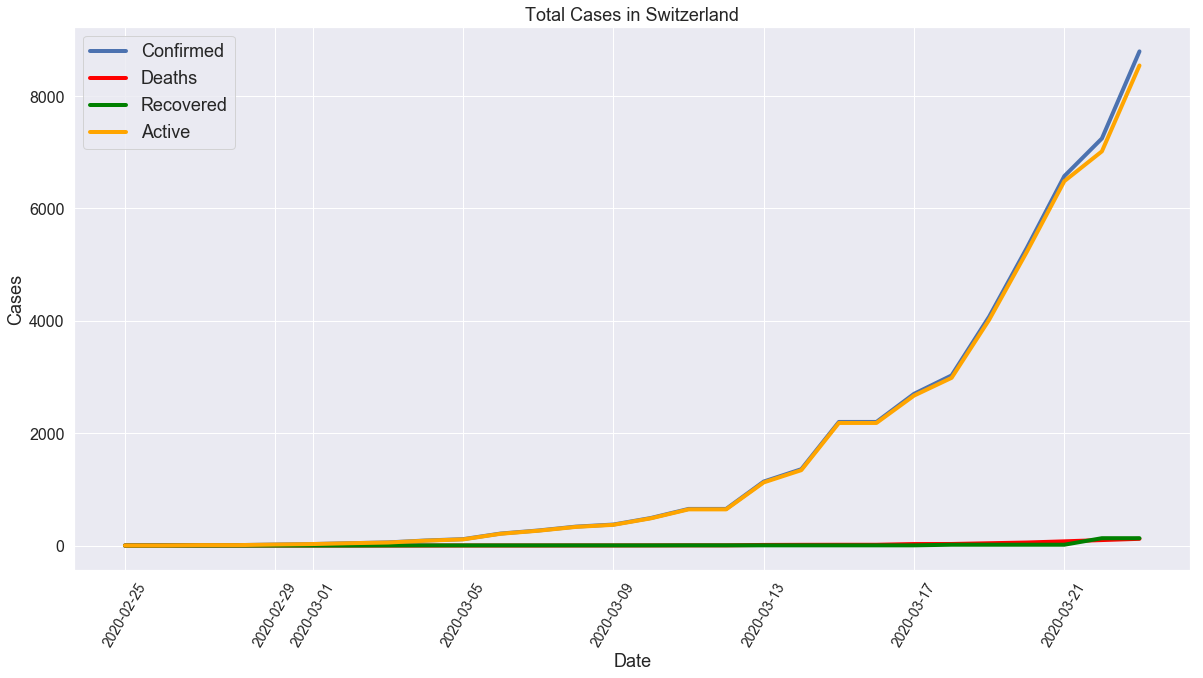

In [77]:
total_cases_lineplot(total_cases_ch, 'Total Cases in Switzerland')

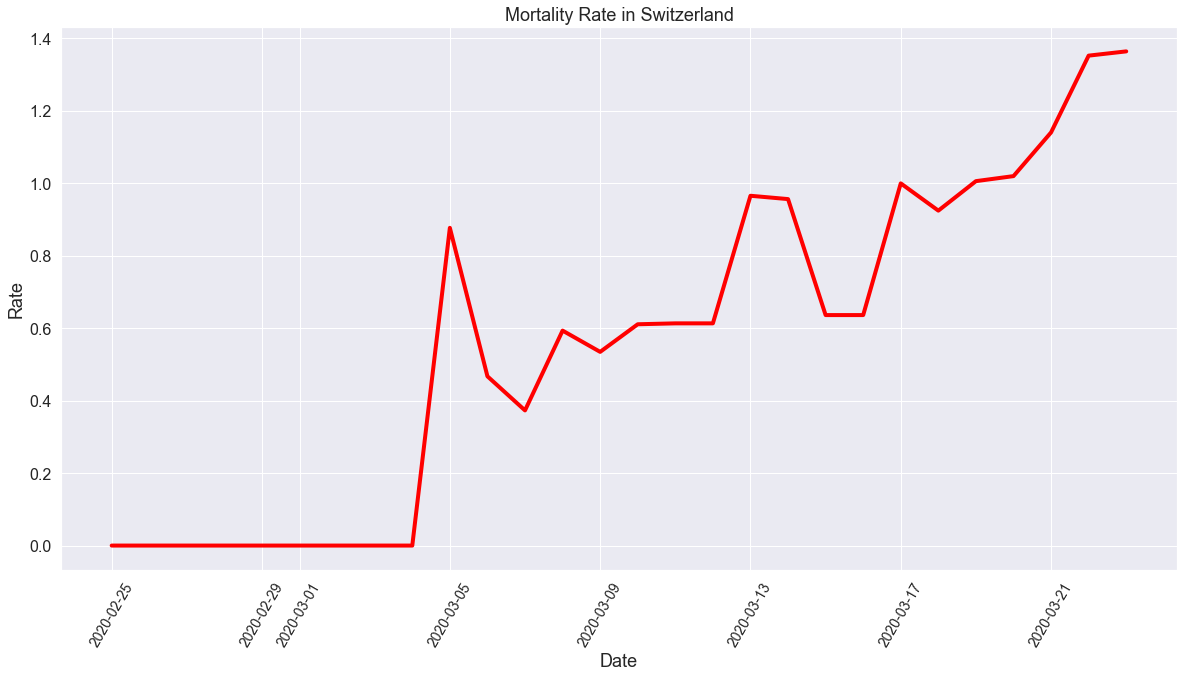

In [78]:
mortality_rate(total_cases_ch, 'Mortality Rate in Switzerland')

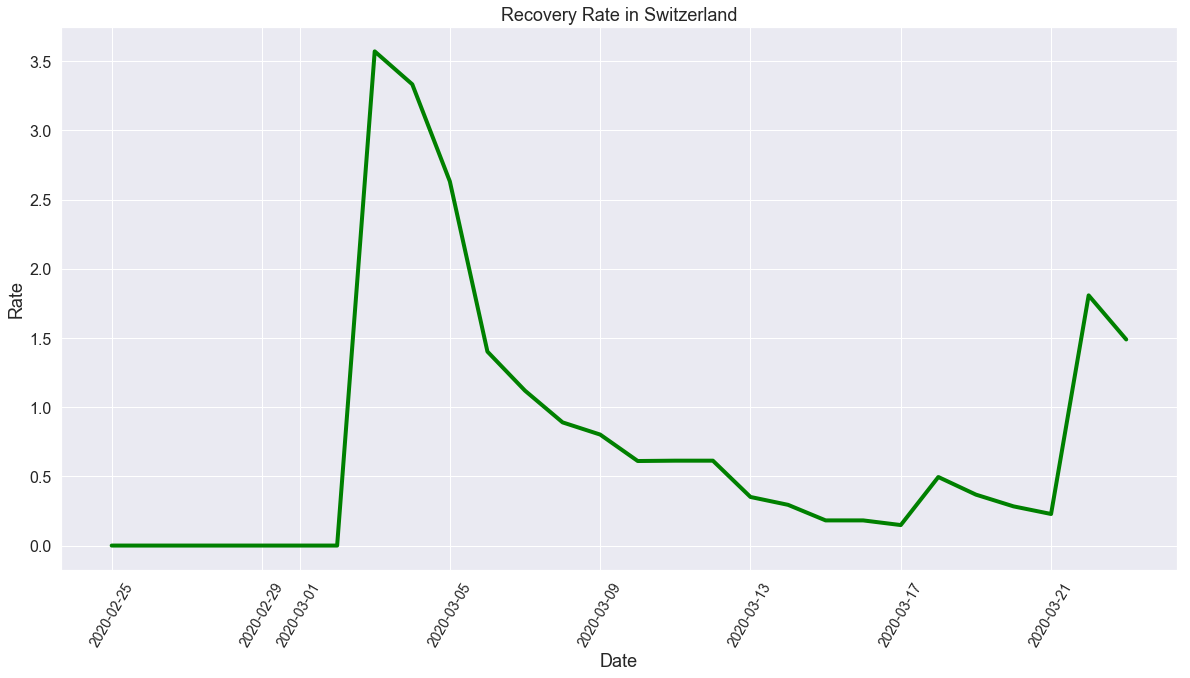

In [79]:
recovery_rate(total_cases_ch, 'Recovery Rate in Switzerland')

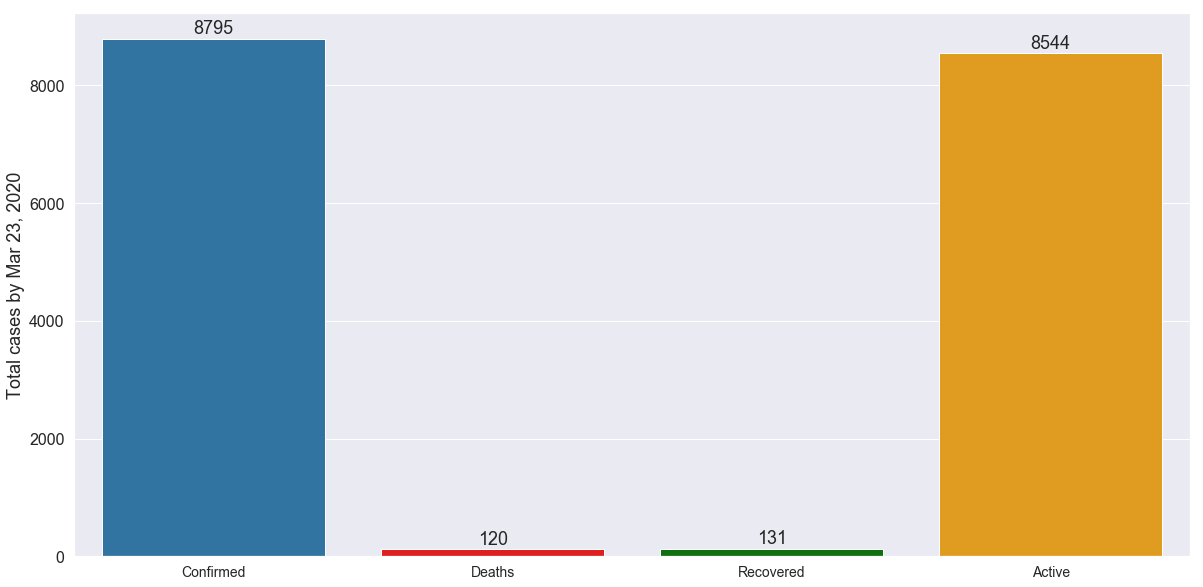

In [80]:
total_latest_barplot(total_cases_ch)

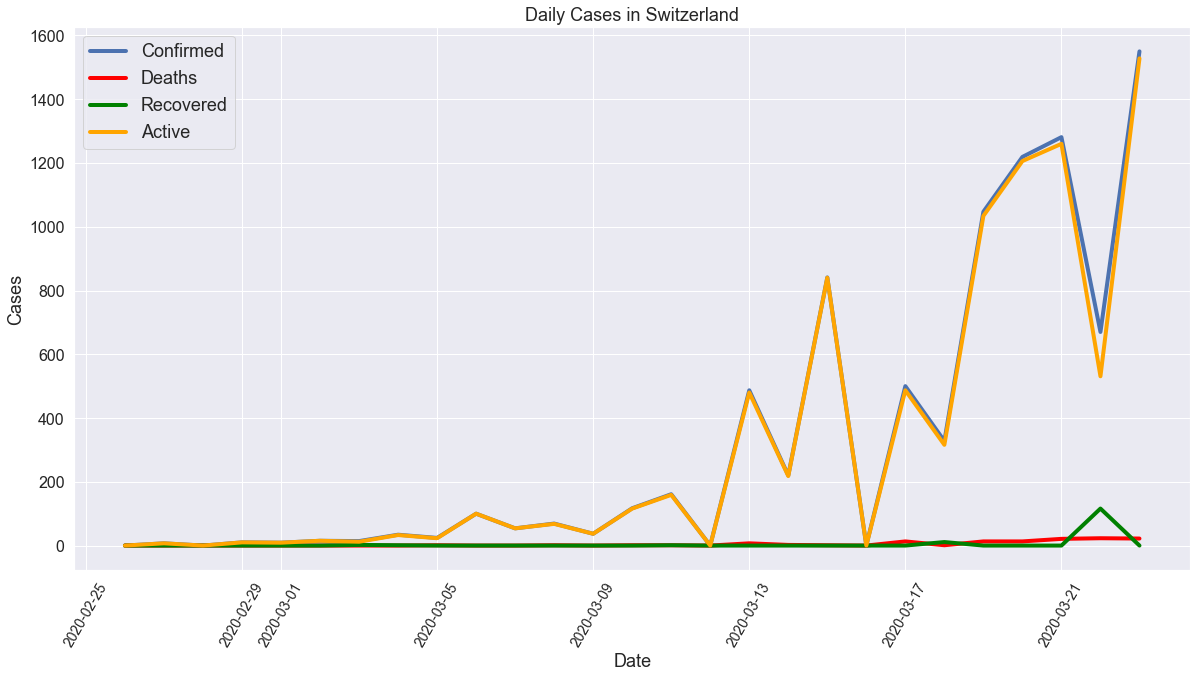

In [81]:
daily_cases(total_cases_ch, 'Daily Cases in Switzerland')

## Diamond Princess Cruise

In [82]:
set(data[data['Province/State'].apply(lambda ps: 'cruise' in ps.lower())]['Province/State'])

{'Cruise Ship', 'Diamond Princess cruise ship', 'Grand Princess Cruise Ship'}

In [83]:
diamon_princess = data[data['Province/State'] == 'Diamond Princess cruise ship'].groupby(['Observed']).sum()

In [84]:
diamon_princess\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-23 00:00:00,761,9,567,185
2020-03-22 00:00:00,761,8,325,428
2020-03-21 00:00:00,761,8,325,428
2020-03-20 00:00:00,761,7,325,429
2020-03-19 00:00:00,759,7,325,427
2020-03-18 00:00:00,759,7,325,427
2020-03-17 00:00:00,743,7,325,411
2020-03-16 00:00:00,743,7,325,411
2020-03-15 00:00:00,742,7,325,410


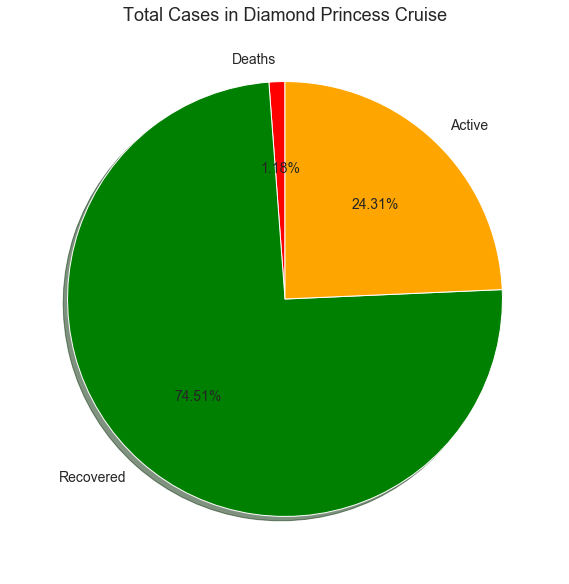

In [85]:
total_cases_pie(diamon_princess, 'Total Cases in Diamond Princess Cruise')

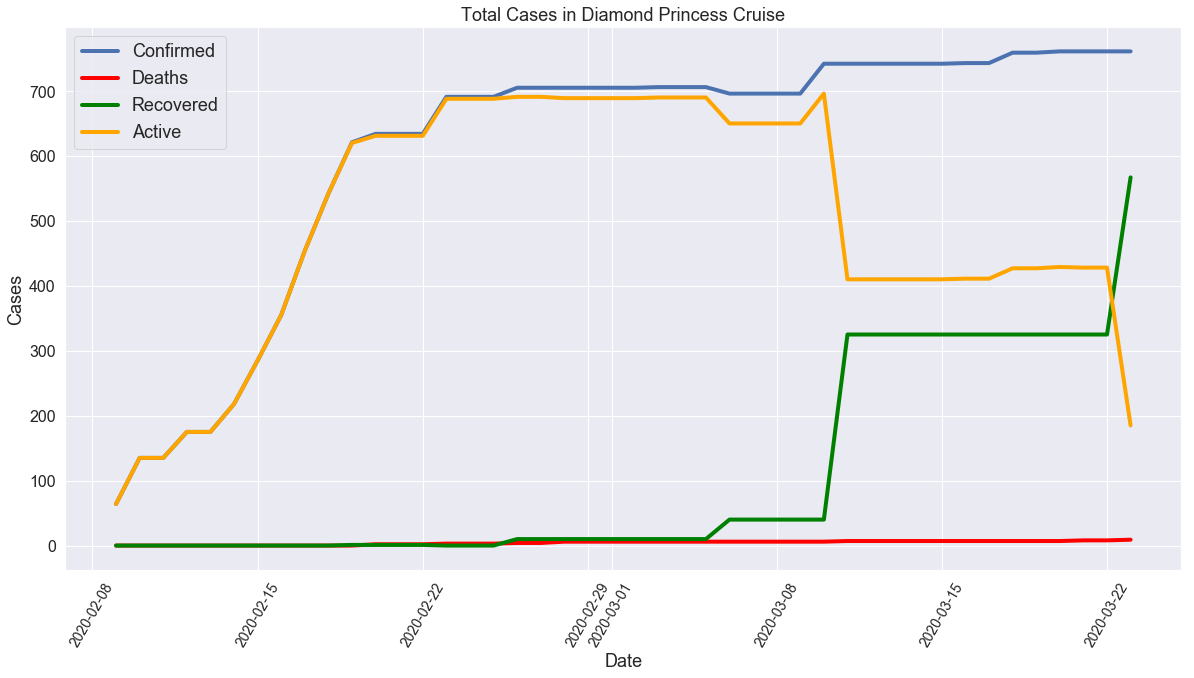

In [86]:
total_cases_lineplot(diamon_princess, 'Total Cases in Diamond Princess Cruise')

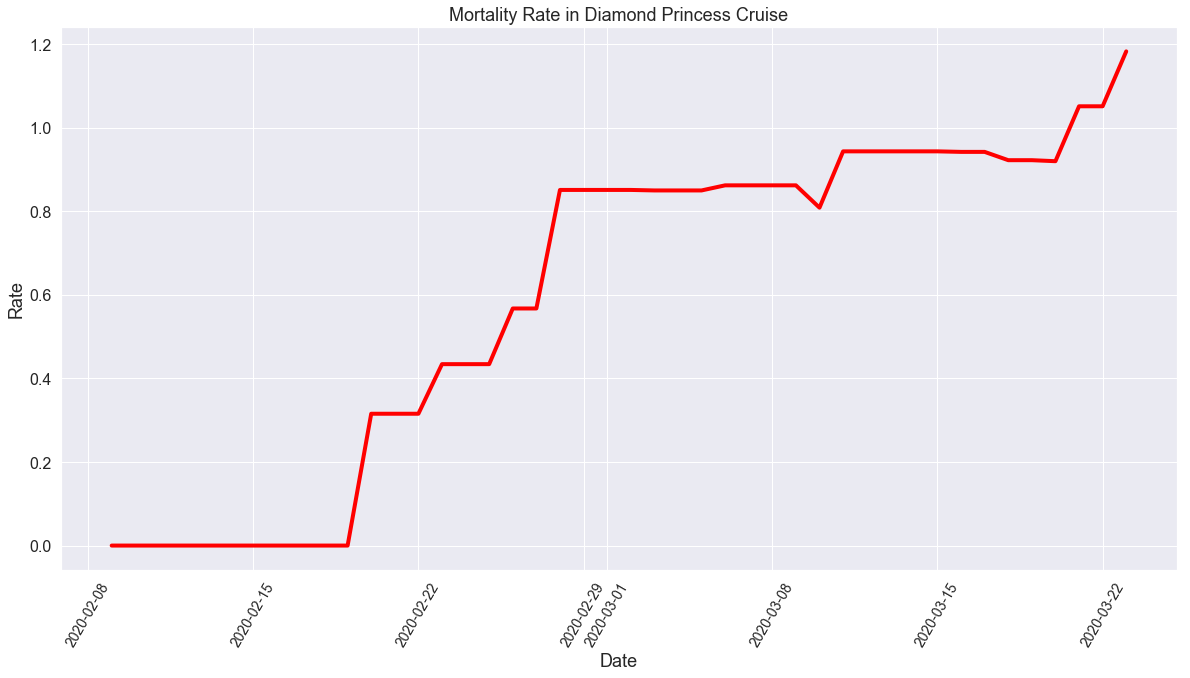

In [87]:
mortality_rate(diamon_princess, 'Mortality Rate in Diamond Princess Cruise')

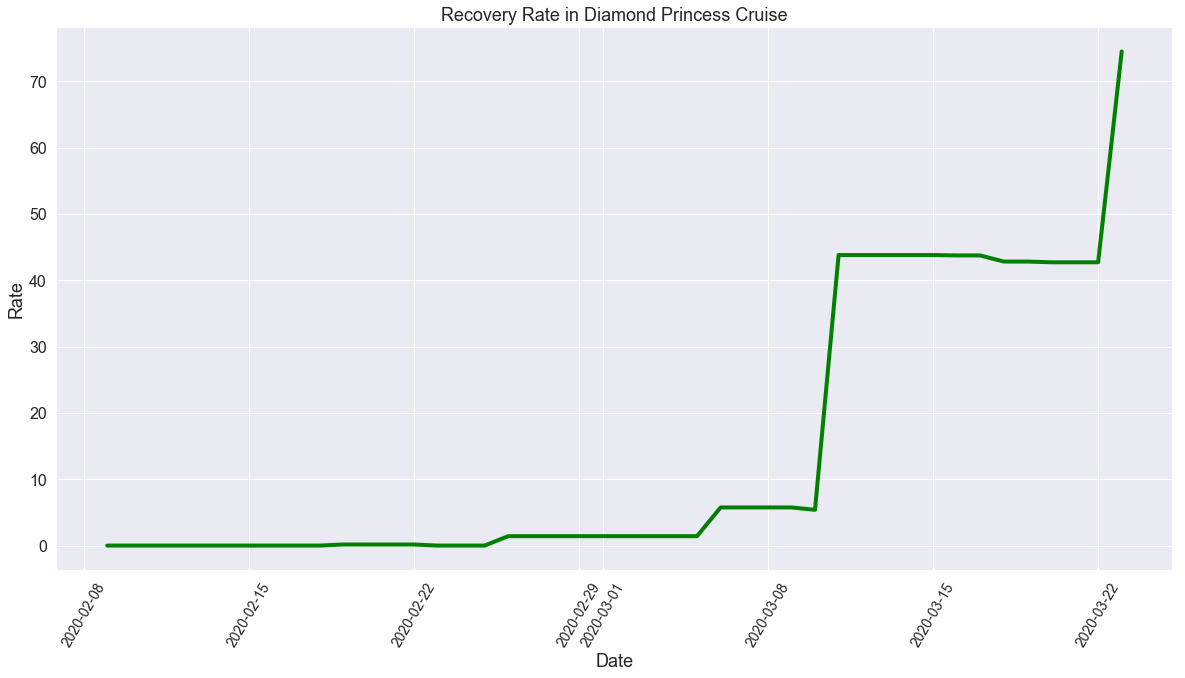

In [88]:
recovery_rate(diamon_princess, 'Recovery Rate in Diamond Princess Cruise')

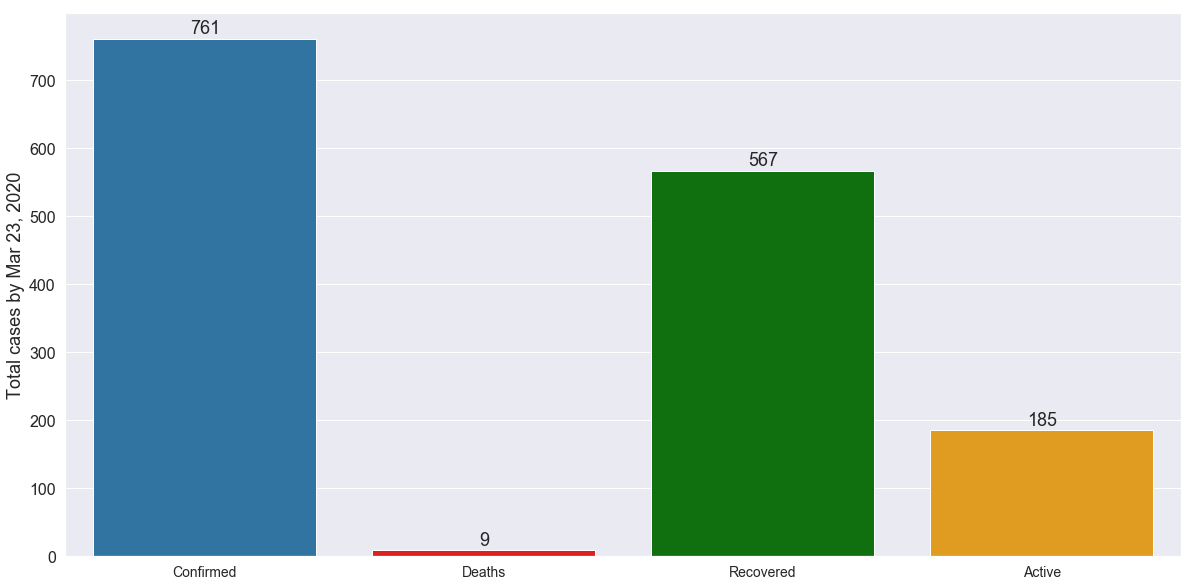

In [89]:
total_latest_barplot(diamon_princess)

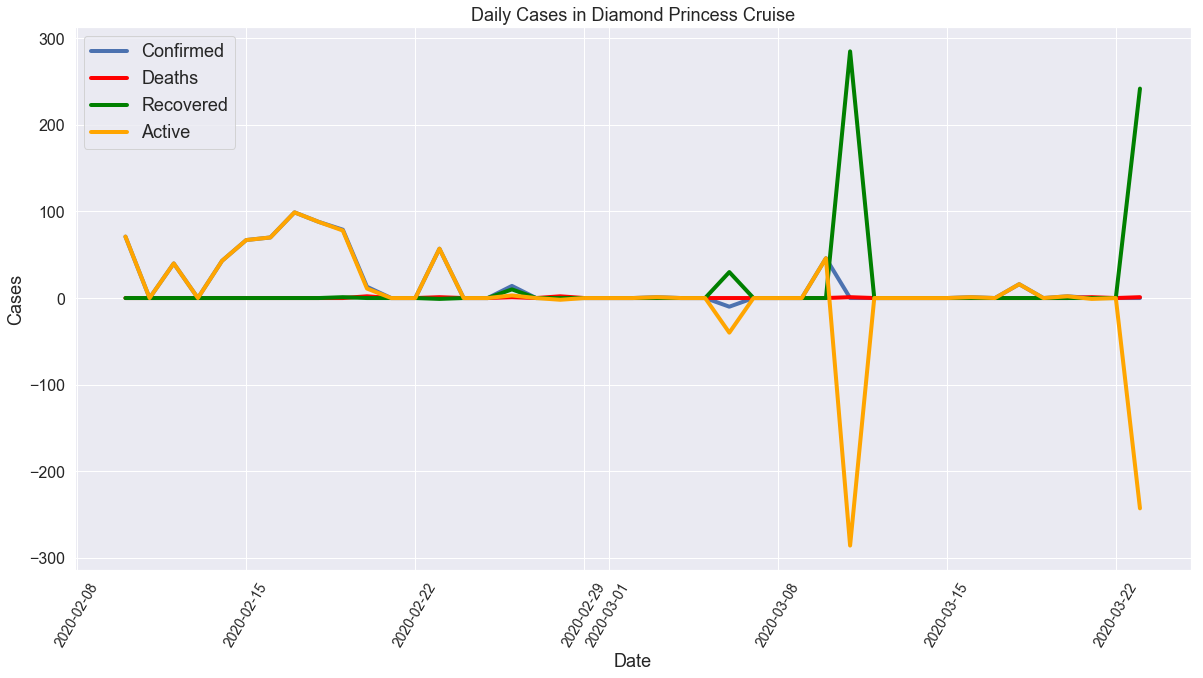

In [90]:
daily_cases(diamon_princess, 'Daily Cases in Diamond Princess Cruise')

## Loading Other Details

Dataset from https://github.com/beoutbreakprepared/nCoV2019

In [91]:
details = pd.read_csv(f'{path_to_dataset}/latestdata.csv')

In [92]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127759 entries, 0 to 127758
Data columns (total 34 columns):
ID                          127522 non-null object
age                         5225 non-null object
sex                         5115 non-null object
city                        57881 non-null object
province                    117927 non-null object
country                     127709 non-null object
wuhan(0)_not_wuhan(1)       64422 non-null float64
latitude                    111519 non-null object
longitude                   111519 non-null object
geo_resolution              111519 non-null object
date_onset_symptoms         1046 non-null object
date_admission_hospital     982 non-null object
date_confirmation           126540 non-null object
symptoms                    1017 non-null object
lives_in_Wuhan              1897 non-null object
travel_history_dates        768 non-null object
travel_history_location     2690 non-null object
reported_market_exposure    1195 non-null

### Listing Symptoms

In [93]:
symptoms = sorted([ item for item in list(set(details['symptoms'])) if type(item) == str])
symptoms = list(filter(lambda s: re.search('\D', s, re.I), symptoms))

In [94]:
dfSymptoms = pd.DataFrame.from_dict({'Symptoms': symptoms})


# Aligning to the left
dfSymptoms.style\
    .hide_index()\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

Symptoms
"37.1 ° C, mild coughing"
Asymptomatic
Contact of hCoV-19/Brazil/SPBR-01/2020
"Cough, fever (38 ℃)"
"Cough, headache, general malaise"
"Cough, headache, general malaise, sore throat"
"Discharge, cough, sore throat, chest pain"
"Fever (37.4 ° C), malaise, sore throa"
Fever (38 ° C)
"Fever (38.1 ° C), cough, headache."


### Age Distribution

In [95]:
def process_age_column(age_range):
    try:
        return np.mean(list(map(lambda age: int(age), age_range.split('-'))))
    except:
        return None

In [96]:
ages = details['age'].apply(process_age_column)

In [97]:
ages = ages[ages.isna() == False]

In [98]:
ages.describe()

count    5156.000000
mean       49.211695
std        17.707518
min         1.000000
25%        34.875000
50%        50.000000
75%        64.000000
max        97.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of Ages for all the Observed Cases')

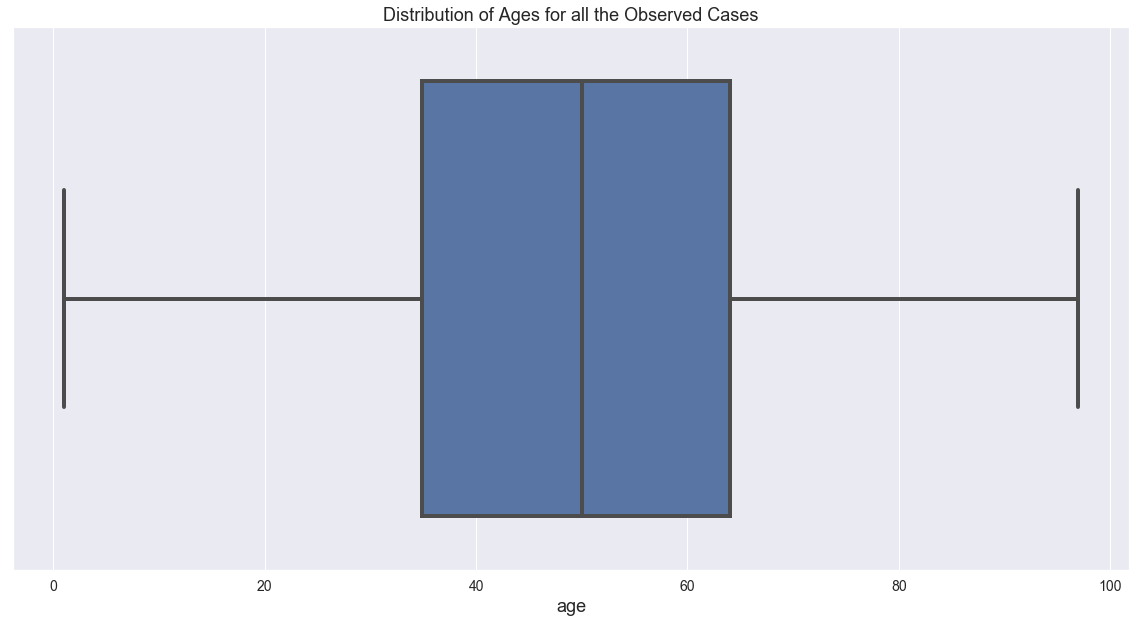

In [99]:
sns.boxplot(ages)
plt.title('Distribution of Ages for all the Observed Cases')

### Sex Distribution

In [100]:
sex = details[details['sex'].isnull() == False]['sex'].apply(lambda sex: sex.lower()).value_counts()

Text(0.5, 1.0, 'Sex Distribution for all the Observed Cases')

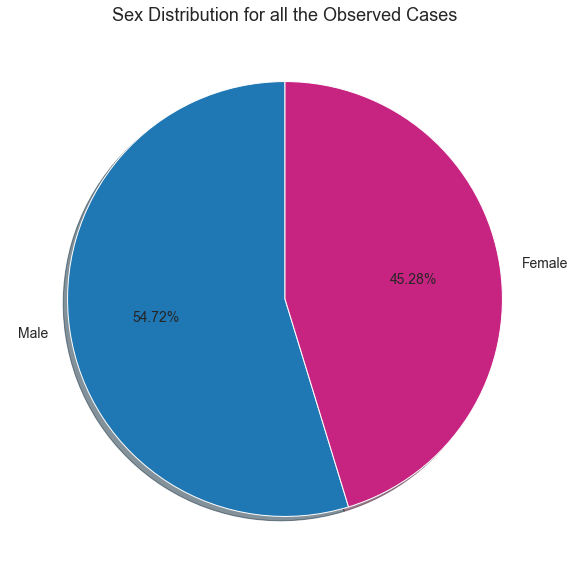

In [101]:
plt.pie(sex, 
        labels=['Male', 'Female'], 
        colors=['#1f77b4', '#c72481'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
plt.title('Sex Distribution for all the Observed Cases')

### Based on Outcome

In [102]:
outcome = details[details['outcome'].isnull() == False][['age', 'sex', 'outcome']]

In [103]:
set(outcome['outcome'].apply(lambda x: x.lower()))

{'critical condition, intubated as of 14.02.2020',
 'dead',
 'death',
 'died',
 'discharge',
 'discharged',
 'discharged from hospital',
 'not hospitalized',
 'recovered',
 'recovering at home 03.03.2020',
 'released from quarantine',
 'severe',
 'stable',
 'symptoms only improved with cough. currently hospitalized for follow-up.',
 'treated in an intensive care unit (14.02.2020)'}

In [104]:
def process_outcome(outcome):
    outcome = outcome.lower()
    if outcome == 'dead' or outcome == 'death' or outcome == 'died':
        return 'dead'
    elif re.search('discharge', outcome) or re.search('recover', outcome) or re.search('released', outcome):
        return 'recovered'
    elif re.search('critical', outcome) or re.search('intensive care', outcome) or outcome == 'severe':
        return 'critical'
    elif outcome == 'not hospitalized':
        return outcome
    elif re.search('currently hospitalized', outcome):
        return 'stable'
    else:
        return 'Unknown'

outcome['outcome'] = outcome['outcome'].apply(process_outcome)

#### Critical Cases by Age

In [105]:
critical_by_age = outcome[\
                       (outcome['age'].isnull() == False) & \
                       (outcome['outcome'].isin(['critical', 'dead']))\
                      ]['age'].apply(process_age_column)

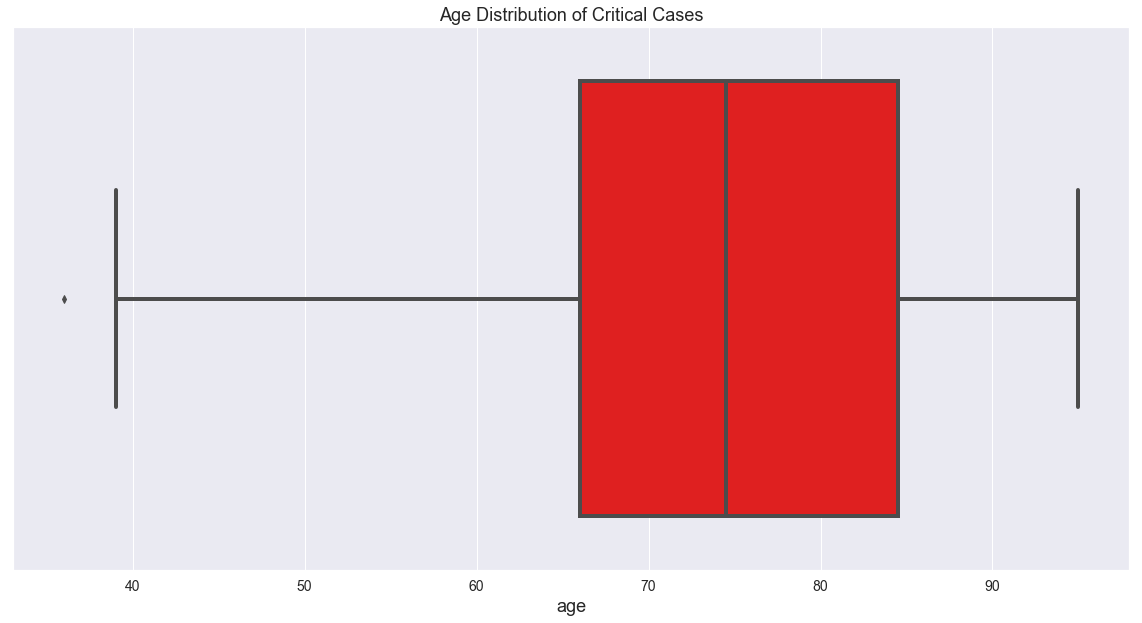

In [106]:
sns.boxplot(critical_by_age, color='red')
_ = plt.title('Age Distribution of Critical Cases')

#### Critical Cases by Sex

In [107]:
critical_by_sex = outcome[\
                       (outcome['sex'].isnull() == False) & \
                       (outcome['outcome'].isin(['critical', 'dead']))\
                      ]['sex']

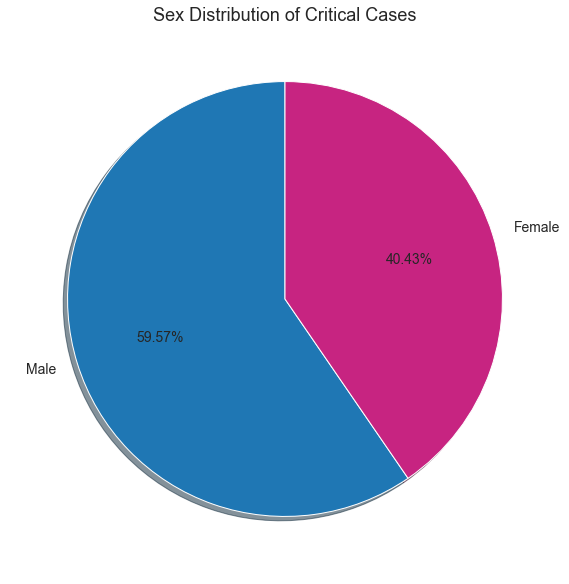

In [108]:
plt.pie(critical_by_sex.value_counts(), 
        labels=['Male', 'Female'], 
        colors=['#1f77b4', '#c72481'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
_ = plt.title('Sex Distribution of Critical Cases')